In [1]:
#############################
#Script = EM_GMM.R
#Author = Somnath Tagore
#Last Update = 03.20.2019
##############################

#Packages

library(tidyverse)
library(reshape2)
library(matrixStats)
library(dplyr)
library(Seurat)
library(gplots)
library(ggplot2)
library(purrr)
library(DropletUtils)
library(SingleCellExperiment)
library(scater)
library(Matrix)
library(celldex)
library(gridExtra)
library(mixtools)
library(hash)

# load gene expression data/raw counts


── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.2.1      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.1 
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count


Attaching SeuratObject


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics


Attaching package: ‘MatrixGenerics’


The follow

In [2]:
pat_list <- c('Sarcoma167GEX', 'Sarcoma322GEX', 'Sarcoma559GEX',
              'Sarcoma708GEX', 'SarcomaS408GEX', 'SarcomaS410GEX', 
              'SarcomaS914GEX', 'SarcomaS956GEX' )

minFeature <- 300
maxFeature <- 7500
minCount <- 600
maxCount <- 40000
maxMT <- 10

#all_cells.list <- lapply(pat_list, function (x) readRDS(paste0('../../../CompiledData/data/', x, '/data_', x, '_genes_', minFeature, '_UMI_', minCount, '_annotated_for_infercnv.rds')))

                         
#for (x in 1:length(all_cells.list)){
    #seu.1<-all_cells.list[[x]]

    #mito.genes <- grep(pattern = "^MT-", x = rownames(seu.1), value = TRUE)
    #rbl.genes <- grep(pattern = "^RB-", x = rownames(seu.1), value = TRUE)
    #rsl.genes <- grep(pattern = "^RS-", x = rownames(seu.1), value = TRUE)
    #rpl.genes <- grep(pattern = "^RPL-", x = rownames(seu.1), value = TRUE)
    #rbl.genes <- grep(pattern = "^RBL-", x = rownames(seu.1), value = TRUE)
    #rps.genes <- grep(pattern = "^RPS-", x = rownames(seu.1), value = TRUE)
    #rbs.genes <- grep(pattern = "^RBS-", x = rownames(seu.1), value = TRUE)
    #rbl1.genes <- grep(pattern = "^RB", x = rownames(seu.1), value = TRUE)
    #rsl1.genes <- grep(pattern = "^RS", x = rownames(seu.1), value = TRUE)
    #3rpl1.genes <- grep(pattern = "^RPL", x = rownames(seu.1), value = TRUE)
    #rbl1.genes <- grep(pattern = "^RBL", x = rownames(seu.1), value = TRUE)
    #rps1.genes <- grep(pattern = "^RPS", x = rownames(seu.1), value = TRUE)
    #rbs1.genes <- grep(pattern = "^RBS", x = rownames(seu.1), value = TRUE)

    #counts <- GetAssayData(seu.1, assay = "RNA")
    #counts <- counts[-(which(rownames(counts) %in% c(mito.genes,rbl.genes,rsl.genes,rpl.genes,rbl.genes,rps.genes,rbs.genes,rbl1.genes,rsl1.genes,rpl1.genes,rbl1.genes,rps1.genes,rbs1.genes))),]
    #seu <- subset(seu.1, features = rownames(counts))

#   seu <- NormalizeData(seu, normalization.method = "LogNormalize", scale.factor = 10000)
#    seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures = 2000)
#    seu <- ScaleData(seu, features = rownames(seu))
#    seu <- RunPCA(seu, features = VariableFeatures(object = seu))
#    seu <- FindNeighbors(seu, dims = 1:15)
#    seu <- FindClusters(seu,resolution=0.4)
#    seu <- RunUMAP(seu, dims = 1:20)
#    all_cells.list[[x]] <- seu
    
    
#}

#merged.all.cells <- merge(x= all_cells.list[[1]], y= all_cells.list[2:8], add.cell.ids = pat_list)

#saveRDS(merged.all.cells, "EM_GMM_Merged_Input.rds")
#merged.all.cells <- readRDS("EM_GMM_Merged_Input.rds")

In [3]:
first_best_samples_H_matrix = c("Sarcoma167GEX/Sarcoma167GEX_KINOMO_nmf_rank_4_H.csv",
                     "Sarcoma322GEX/Sarcoma322GEX_KINOMO_nmf_rank_3_H.csv",
                     "Sarcoma559GEX/Sarcoma559GEX_KINOMO_nmf_rank_3_H.csv",
                     "Sarcoma708GEX/Sarcoma708GEX_KINOMO_nmf_rank_4_H.csv",
                     "SarcomaS408GEX/SarcomaS408GEX_KINOMO_nmf_rank_3_H.csv",
                     "SarcomaS410GEX/SarcomaS410GEX_KINOMO_nmf_rank_3_H.csv",
                     "SarcomaS914GEX/SarcomaS914GEX_KINOMO_nmf_rank_3_H.csv",
                     "SarcomaS956GEX/SarcomaS956GEX_KINOMO_nmf_rank_5_H.csv")
H.mat.list <- lapply(first_best_samples_H_matrix, function (x) read.csv(x))


In [4]:
pat_list <- c('Sarcoma167GEX', 'Sarcoma322GEX', 'Sarcoma559GEX',
              'Sarcoma708GEX', 'SarcomaS408GEX', 'SarcomaS410GEX', 
              'SarcomaS914GEX', 'SarcomaS956GEX' )

index <- 1

## hash-2.2.6 provided by Decision Patterns

rank.cell.mappings <- hash() 


for (x in pat_list){
    print(first_best_samples_H_matrix[[index]])
    for (y in rownames(H.mat.list[[index]])){
        rank.cell.mappings[[paste0(x, ".", y)]] <- list()
        print(y)
    }
    for (y in colnames(H.mat.list[[index]])){
        rank <- which.max(H.mat.list[[index]][[y]])
        rank.cell.mappings[[paste0(x, ".", rank)]] <- append(rank.cell.mappings[[paste0(x, ".", rank)]], y)
    }
    index <- index + 1
}

[1] "Sarcoma167GEX/Sarcoma167GEX_KINOMO_nmf_rank_4_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "Sarcoma322GEX/Sarcoma322GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "Sarcoma559GEX/Sarcoma559GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "Sarcoma708GEX/Sarcoma708GEX_KINOMO_nmf_rank_4_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "SarcomaS408GEX/SarcomaS408GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "SarcomaS410GEX/SarcomaS410GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "SarcomaS914GEX/SarcomaS914GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "SarcomaS956GEX/SarcomaS956GEX_KINOMO_nmf_rank_5_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"


In [5]:
pat_list <- c('Sarcoma167GEX', 'Sarcoma322GEX', 'Sarcoma559GEX', 'Sarcoma708GEX', 'SarcomaS408GEX', 'SarcomaS410GEX', 'SarcomaS914GEX', 'SarcomaS956GEX')
minFeature <- 300
minCount <- 600


object.list <- lapply(pat_list, function (x) readRDS(paste0("~/CompiledData/data/", x, "/data_", 
                                        x, "_genes_", minFeature, '_UMI_', minCount, '_annotated_for_infercnv.rds')))
                      



In [6]:
rank.cell.seurats <- hash() 

In [7]:


index <- 1           
for (x in pat_list){
    print(first_best_samples_H_matrix[[index]])
    for (y in rownames(H.mat.list[[index]])){
        temp <- RenameCells(object.list[[index]],
                            new.names =gsub(x = Cells(object.list[[index]]), pattern = "-", replacement = "."))
        for (z in colnames(df)){
            temp <- AddModuleScore(
                  object = temp,
                  features = list(as.vector(unlist(df[z],  use.names=FALSE))), 
                  name = paste0(z, "_metaprogram_genes"),
                  assay = "RNA"
                )
        }
        
        rank.cell.seurats[[paste0(x, ".", y)]] <- 
            subset(temp, cells=unlist(rank.cell.mappings[[paste0(x, ".", y)]], use.names=FALSE))
    }
    index <- index + 1
}

[1] "Sarcoma167GEX/Sarcoma167GEX_KINOMO_nmf_rank_4_H.csv"
[1] "Sarcoma322GEX/Sarcoma322GEX_KINOMO_nmf_rank_3_H.csv"
[1] "Sarcoma559GEX/Sarcoma559GEX_KINOMO_nmf_rank_3_H.csv"
[1] "Sarcoma708GEX/Sarcoma708GEX_KINOMO_nmf_rank_4_H.csv"
[1] "SarcomaS408GEX/SarcomaS408GEX_KINOMO_nmf_rank_3_H.csv"
[1] "SarcomaS410GEX/SarcomaS410GEX_KINOMO_nmf_rank_3_H.csv"
[1] "SarcomaS914GEX/SarcomaS914GEX_KINOMO_nmf_rank_3_H.csv"
[1] "SarcomaS956GEX/SarcomaS956GEX_KINOMO_nmf_rank_5_H.csv"


In [8]:
rank.cell.seurats

<hash> containing 28 key-value pair(s).
  Sarcoma167GEX.1 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma167GEX.2 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma167GEX.3 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma167GEX.4 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma322GEX.1 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma322GEX.2 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma322GEX.3 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma559GEX.1 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma559GEX.2 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma559GEX.3 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma708GEX.1 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma708GEX.2 : <S4 class ‘Seurat’ [package “SeuratObject”] with 13 slots>
  Sarcoma708

In [9]:
MP1 = c('Sarcoma322GEX.3', 'SarcomaS410GEX.3', 'SarcomaS914GEX.2', 'SarcomaS956GEX.1','SarcomaS956GEX.2', 'SarcomaS956GEX.4')

#Index(['V2_167', 'V2_708', 'V1_S408', 'V1_S410', 'V3_S914', 'V5_S956'], dtype='object')

MP2 = c('Sarcoma167GEX.2','Sarcoma708GEX.2','SarcomaS408GEX.1', 'SarcomaS410GEX.1' , 
        'SarcomaS914GEX.3','SarcomaS956GEX.5')

#Index(['V3_559', 'V4_708', 'V3_S408'], dtype='object')

MP3 = c('Sarcoma559GEX.3', 'Sarcoma708GEX.4', 'SarcomaS408GEX.3')

#Index(['V3_167', 'V2_322', 'V2_559', 'V3_708'], dtype='object')

MP4 = c('Sarcoma167GEX.3', 'Sarcoma322GEX.2', 'Sarcoma559GEX.2', 'Sarcoma708GEX.3')

#Index(['V1_167', 'V4_167', 'V1_708', 'V2_S408'], dtype='object')

MP5 = c('Sarcoma167GEX.1', 'Sarcoma167GEX.4', 'Sarcoma708GEX.1', 'SarcomaS408GEX.2')

#Index(['V1_322', 'V2_S410', 'V1_S914', 'V3_S956'], dtype='object')

MP6 = c('Sarcoma322GEX.1', 'SarcomaS410GEX.2', 'SarcomaS914GEX.1', 'SarcomaS956GEX.3')


MP7 = c('Sarcoma559GEX.3')

MPs = list(MP4, MP2, MP1, MP3, MP5, MP6, MP7)
names = list('MP1', 'MP2', 'MP3', 'MP4', 'MP5', 'MP6', 'MP7')


In [10]:
MP_seurats = c()
for (i in MPs){
    t_list <- c()
    for (j in i){
        t_list <- c(t_list,rank.cell.seurats[[j]] )    
    }

    if(length(i) >= 2){    
        print(i)
        merged <- merge(rank.cell.seurats[[i[1]]], y =t_list[2:length(t_list)] ,
                        add.cell.ids = as.vector(i))
        MP_seurats <- c(MP_seurats, merged)

    }else{
        MP_seurats <- c( MP_seurats, rank.cell.seurats[[i[1]]])
    }
        
    
}

[1] "Sarcoma167GEX.3" "Sarcoma322GEX.2" "Sarcoma559GEX.2" "Sarcoma708GEX.3"
[1] "Sarcoma167GEX.2"  "Sarcoma708GEX.2"  "SarcomaS408GEX.1" "SarcomaS410GEX.1"
[5] "SarcomaS914GEX.3" "SarcomaS956GEX.5"
[1] "Sarcoma322GEX.3"  "SarcomaS410GEX.3" "SarcomaS914GEX.2" "SarcomaS956GEX.1"
[5] "SarcomaS956GEX.2" "SarcomaS956GEX.4"
[1] "Sarcoma559GEX.3"  "Sarcoma708GEX.4"  "SarcomaS408GEX.3"
[1] "Sarcoma167GEX.1"  "Sarcoma167GEX.4"  "Sarcoma708GEX.1"  "SarcomaS408GEX.2"
[1] "Sarcoma322GEX.1"  "SarcomaS410GEX.2" "SarcomaS914GEX.1" "SarcomaS956GEX.3"


In [11]:
print(MP_seurats)

[[1]]
An object of class Seurat 
34073 features across 10041 samples within 1 assay 
Active assay: RNA (34073 features, 0 variable features)

[[2]]
An object of class Seurat 
34792 features across 11325 samples within 1 assay 
Active assay: RNA (34792 features, 0 variable features)

[[3]]
An object of class Seurat 
33776 features across 13276 samples within 1 assay 
Active assay: RNA (33776 features, 0 variable features)

[[4]]
An object of class Seurat 
33772 features across 6183 samples within 1 assay 
Active assay: RNA (33772 features, 0 variable features)

[[5]]
An object of class Seurat 
33827 features across 23254 samples within 1 assay 
Active assay: RNA (33827 features, 0 variable features)

[[6]]
An object of class Seurat 
33776 features across 5833 samples within 1 assay 
Active assay: RNA (33776 features, 0 variable features)

[[7]]
An object of class Seurat 
29775 features across 1659 samples within 1 assay 
Active assay: RNA (29775 features, 2000 variable features)
 2 dime

In [12]:
t <- MP_seurats[[1]][, sample(colnames(MP_seurats[[1]]), size = 1000, replace=F)]

In [13]:
seu <- NormalizeData(t, normalization.method = "LogNormalize", scale.factor = 1000)
seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures = 2000)
seu <- ScaleData(seu, features = rownames(seu))



Centering and scaling data matrix



In [14]:
gene_exp.copy1 <- seu
#gene_exp.copy1 <- gene_exp.copy1[, sample(colnames(gene_exp.copy1), size = 1000, replace=F)]

gene_exp.copy1


An object of class Seurat 
34073 features across 1000 samples within 1 assay 
Active assay: RNA (34073 features, 2000 variable features)

In [15]:

#for(i in 1:ncol(gene_exp.copy1)){
#  gene_exp.copy1[,i] <- 1E6*gene_exp.copy1[,i]/sum(gene_exp.copy1[,i])
#}

In [16]:
gene_exp.copy1 <- as.matrix(GetAssayData(gene_exp.copy1)) 


In [17]:
df <- read.csv("t100_genes_per_metaprogram_6_MP.csv")
samp = "MP_5"
genes <- as.vector(as.list(df[samp])$MP_5)
genes
df


[1] "FP236383.3" "FP671120.4" "COL1A2"     "COL1A1"     "COL6A2"    
  [6] "VIM"        "ACTB"       "EEF1A1"     "COL6A1"     "COL5A1"    
 [11] "FN1"        "MALAT1"     "B2M"        "EEF2"       "HLA-B"     
 [16] "GSN"        "CFD"        "FSTL1"      "HLA-A"      "TIMP2"     
 [21] "HNRNPA2B1"  "MYH9"       "COL7A1"     "APP"        "COL3A1"    
 [26] "H3F3B"      "FTH1"       "SRRM2"      "HSP90AA1"   "COL6A3"    
 [31] "AHNAK"      "S100A6"     "DYNC1H1"    "MT2A"       "COL4A1"    
 [36] "TPM4"       "S100A11"    "NORAD"      "FLNA"       "CANX"      
 [41] "HLA-C"      "VCAN"       "TUBB"       "FGFR1"      "CALD1"     
 [46] "DST"        "ACTG1"      "NEAT1"      "HSP90AB1"   "PPIA"      
 [51] "CST3"       "MFAP4"      "S100A10"    "MMP2"       "LMNA"      
 [56] "CCDC80"     "TXNIP"      "MAP1B"      "MACF1"      "COL4A2"    
 [61] "TAGLN2"     "FTL"        "SFRP1"      "FBLN2"      "TIMP3"     
 [66] "FBLN1"      "FBN1"       "IFITM3"     "PFN1"       "PMP22"     
 [71] "IGF2"       "TUBA1B"     "ADAMTS2"    "ABI3BP"     "GSE1"      
 [76] "IGFBP7"     "NFIC"       "SDK1"       "LRP1"       "SPTBN1"    
 [81] "LAPTM4A"    "UAP1"       "PRKDC"      "RRBP1"      "ADAR"      
 [86] "INHBA"      "ITGB1"      "PSAP"       "H19"        "NCOR2"     
 [91] "C1S"        "NUPR1"      "FAM20C"     "DCN"        "HSPB1"     
 [96] "AGAP1"      "SPARC"      "PRRC2C"     "TMSB10"     "ANKRD11"

MP_0       MP_1       MP_2       MP_3       MP_4        MP_5      
1   MALAT1     MALAT1     MALAT1     MALAT1     MALAT1      FP236383.3
2   RBMS3      NEAT1      NEAT1      PTPRC      FN1         FP671120.4
3   AUTS2      LRMDA      FP236383.3 MBNL1      COL3A1      COL1A2    
4   FP236383.3 PLXDC2     ZBTB20     ARHGAP15   COL1A2      COL1A1    
5   MBNL1      DPYD       QKI        PRKCH      FP236383.3  COL6A2    
6   PTPRG      DOCK4      XIST       RABGAP1L   COL6A3      VIM       
7   LRMDA      CHST11     FNDC3B     CBLB       COL1A1      ACTB      
8   NEAT1      ZEB2       PPP2R2B    SKAP1      EXT1        EEF1A1    
9   MIR99AHG   AKAP13     PDE4B      PARP8      GPC6        COL6A1    
10  TENM3      ELMO1      PCDH9      UTRN       NEAT1       COL5A1    
11  COL1A2     SAT1       DLG2       CELF2      CALD1       FN1       
12  SDK1       TCF12      ELMO1      ZBTB20     VMP1        MALAT1    
13  TTC28      MBNL1      MED13L     ANKRD44    FBXL7       B2M       
14  KAZN       LPP        SIK3       TOX        TRIO        EEF2      
15  GPC6       ITPR2      DPYD       CHST11     COL5A2      HLA-B     
16  FP671120.4 FOXN3      EXOC4      ATXN1      CAMK2D      GSN       
17  DST        FNDC3B     MBNL1      LRBA       VPS13B      CFD       
18  FNDC3B     UTRN       FP671120.4 FYN        DUXAP8      FSTL1     
19  FTX        MAML2      TCF12      INPP4B     PRKG1       HLA-A     
20  RAD51B     SLC8A1     IGLV2-8    PIP4K2A    FNDC3B      TIMP2     
21  ARID1B     FP236383.3 MACF1      SMCHD1     ZEB2        HNRNPA2B1 
22  ZBTB20     MACF1      ATXN1      THEMIS     CDK14       MYH9      
23  RUNX1T1    PICALM     CADM2      RNF213     DST         COL7A1    
24  STK3       QKI        MBP        FYB1       STK3        APP       
25  FOXP1      SFMBT2     IGHG2      ARAP2      EPS8        COL3A1    
26  STAG1      ETV6       TBC1D5     CDC42SE2   PTK2        H3F3B     
27  JMJD1C     CELF2      IGHG1      NEAT1      ZFAND3      FTH1      
28  NRXN3      FMNL2      FRMD5      DOCK10     AKAP13      SRRM2     
29  TCF12      ATXN1      IL1RAPL1   FOXN3      PDE3A       HSP90AA1  
30  EXOC4      HIF1A      DST        LYST       ASAP1       COL6A3    
⋮   ⋮          ⋮          ⋮          ⋮          ⋮           ⋮         
71  PCDH9      ARHGAP18   ANK3       HLA-A      FAM110B     IGF2      
72  EXT1       AOAH       ST18       RNF19A     COL6A1      TUBA1B    
73  VCAN       LDLRAD4    SLC24A2    HLA-B      ABCC9       ADAMTS2   
74  DOCK4      FMN1       ETV6       FAM172A    KANSL1      ABI3BP    
75  MEIS1      SSH2       AC008014.1 TNRC6B     SDC2        GSE1      
76  RERE       SIPA1L1    ARHGAP24   SLFN12L    JMJD1C      IGFBP7    
77  NCOA2      TCF4       FOXN3      IQGAP2     ETV6        NFIC      
78  ADAMTS9    KANSL1     ITPR2      ITPR2      PRKDC       SDK1      
79  MACF1      ARID1B     DLG1       FNBP1      SPATA5      LRP1      
80  PRDM1      KCNMA1     DNM3       TCF12      RAPGEF2     SPTBN1    
81  GPHN       FAM49B     FTX        MED13L     PALM2-AKAP2 LAPTM4A   
82  PDE4D      UBE2E2     PICALM     EXOC4      HNRNPA2B1   UAP1      
83  PLCB1      DOCK10     XBP1       FUT8       SPIDR       PRKDC     
84  MAP2       MARCH1     UBE2E2     PDE3B      MEF2A       RRBP1     
85  ZFHX3      MRC1       CEP128     FP236383.3 NFIA        ADAR      
86  PVT1       WDFY3      MSI2       CD44       FNIP2       INHBA     
87  SORCS2     TBXAS1     RUNX1      HNRNPA2B1  PARD3B      ITGB1     
88  SEMA5A     TLR2       LRP1B      KMT2C      BIRC6       PSAP      
89  HIPK2      ARL15      FCHSD2     CNOT6L     COL5A1      H19       
90  ZEB2       FHIT       LPP        ARHGAP26   ARID1B      NCOR2     
91  SSBP3      RBM47      NTM        TXNIP      DPYD        C1S       
92  DCC        ZSWIM6     UTRN       FTX        SEPTIN7     NUPR1     
93  PIEZO2     SBF2       ANK2       BCL2       TBC1D5      FAM20C    
94  EBF1       SLCO2B1    FOS        STAG1      SLC8A1      DCN       
95  GRM7       RUNX1      CT

In [18]:
gene_list <- unique(unname(unlist(head(df, 50))))

df

MP_0       MP_1       MP_2       MP_3       MP_4        MP_5      
1   MALAT1     MALAT1     MALAT1     MALAT1     MALAT1      FP236383.3
2   RBMS3      NEAT1      NEAT1      PTPRC      FN1         FP671120.4
3   AUTS2      LRMDA      FP236383.3 MBNL1      COL3A1      COL1A2    
4   FP236383.3 PLXDC2     ZBTB20     ARHGAP15   COL1A2      COL1A1    
5   MBNL1      DPYD       QKI        PRKCH      FP236383.3  COL6A2    
6   PTPRG      DOCK4      XIST       RABGAP1L   COL6A3      VIM       
7   LRMDA      CHST11     FNDC3B     CBLB       COL1A1      ACTB      
8   NEAT1      ZEB2       PPP2R2B    SKAP1      EXT1        EEF1A1    
9   MIR99AHG   AKAP13     PDE4B      PARP8      GPC6        COL6A1    
10  TENM3      ELMO1      PCDH9      UTRN       NEAT1       COL5A1    
11  COL1A2     SAT1       DLG2       CELF2      CALD1       FN1       
12  SDK1       TCF12      ELMO1      ZBTB20     VMP1        MALAT1    
13  TTC28      MBNL1      MED13L     ANKRD44    FBXL7       B2M       
14  KAZN       LPP        SIK3       TOX        TRIO        EEF2      
15  GPC6       ITPR2      DPYD       CHST11     COL5A2      HLA-B     
16  FP671120.4 FOXN3      EXOC4      ATXN1      CAMK2D      GSN       
17  DST        FNDC3B     MBNL1      LRBA       VPS13B      CFD       
18  FNDC3B     UTRN       FP671120.4 FYN        DUXAP8      FSTL1     
19  FTX        MAML2      TCF12      INPP4B     PRKG1       HLA-A     
20  RAD51B     SLC8A1     IGLV2-8    PIP4K2A    FNDC3B      TIMP2     
21  ARID1B     FP236383.3 MACF1      SMCHD1     ZEB2        HNRNPA2B1 
22  ZBTB20     MACF1      ATXN1      THEMIS     CDK14       MYH9      
23  RUNX1T1    PICALM     CADM2      RNF213     DST         COL7A1    
24  STK3       QKI        MBP        FYB1       STK3        APP       
25  FOXP1      SFMBT2     IGHG2      ARAP2      EPS8        COL3A1    
26  STAG1      ETV6       TBC1D5     CDC42SE2   PTK2        H3F3B     
27  JMJD1C     CELF2      IGHG1      NEAT1      ZFAND3      FTH1      
28  NRXN3      FMNL2      FRMD5      DOCK10     AKAP13      SRRM2     
29  TCF12      ATXN1      IL1RAPL1   FOXN3      PDE3A       HSP90AA1  
30  EXOC4      HIF1A      DST        LYST       ASAP1       COL6A3    
⋮   ⋮          ⋮          ⋮          ⋮          ⋮           ⋮         
71  PCDH9      ARHGAP18   ANK3       HLA-A      FAM110B     IGF2      
72  EXT1       AOAH       ST18       RNF19A     COL6A1      TUBA1B    
73  VCAN       LDLRAD4    SLC24A2    HLA-B      ABCC9       ADAMTS2   
74  DOCK4      FMN1       ETV6       FAM172A    KANSL1      ABI3BP    
75  MEIS1      SSH2       AC008014.1 TNRC6B     SDC2        GSE1      
76  RERE       SIPA1L1    ARHGAP24   SLFN12L    JMJD1C      IGFBP7    
77  NCOA2      TCF4       FOXN3      IQGAP2     ETV6        NFIC      
78  ADAMTS9    KANSL1     ITPR2      ITPR2      PRKDC       SDK1      
79  MACF1      ARID1B     DLG1       FNBP1      SPATA5      LRP1      
80  PRDM1      KCNMA1     DNM3       TCF12      RAPGEF2     SPTBN1    
81  GPHN       FAM49B     FTX        MED13L     PALM2-AKAP2 LAPTM4A   
82  PDE4D      UBE2E2     PICALM     EXOC4      HNRNPA2B1   UAP1      
83  PLCB1      DOCK10     XBP1       FUT8       SPIDR       PRKDC     
84  MAP2       MARCH1     UBE2E2     PDE3B      MEF2A       RRBP1     
85  ZFHX3      MRC1       CEP128     FP236383.3 NFIA        ADAR      
86  PVT1       WDFY3      MSI2       CD44       FNIP2       INHBA     
87  SORCS2     TBXAS1     RUNX1      HNRNPA2B1  PARD3B      ITGB1     
88  SEMA5A     TLR2       LRP1B      KMT2C      BIRC6       PSAP      
89  HIPK2      ARL15      FCHSD2     CNOT6L     COL5A1      H19       
90  ZEB2       FHIT       LPP        ARHGAP26   ARID1B      NCOR2     
91  SSBP3      RBM47      NTM        TXNIP      DPYD        C1S       
92  DCC        ZSWIM6     UTRN       FTX        SEPTIN7     NUPR1     
93  PIEZO2     SBF2       ANK2       BCL2       TBC1D5      FAM20C    
94  EBF1       SLCO2B1    FOS        STAG1      SLC8A1      DCN       
95  GRM7       RUNX1      CT

In [19]:
for (x in 1:length(gene_list)){
    



            gene_exp<-gene_exp.copy1[gene_list[x],]

            mygrobsem<-list()
            gg.mixEM <- function(EM, gene) {
            #  require(ggplot2)
              x       <- with(EM,seq(min(x),max(x),len=1000))
              pars    <- with(EM,data.frame(comp=colnames(posterior), mu, sigma,lambda))
              em.df   <- data.frame(x=rep(x,each=nrow(pars)),pars)
              em.df$y <- with(em.df,lambda*dnorm(x,mean=mu,sd=sigma))

              saveRDS(em.df , paste0('EM_GMM_Output_Files/', gene, "em.df.rds"))

              ggplot(data.frame(x=EM$x),aes(x,y=..density..)) + 
                #type = rep(c('tumor', 'normal'), c(503,313)) +
                #geom_histogram(fill=NA,color="black")+
                geom_polygon(data=em.df,aes(x,y,fill=comp),color="grey50", alpha=0.5)+
                #geom_polygon(data=em.df,aes(x,y,fill=type),color="grey50", alpha=0.5)+
                scale_fill_discrete("Component\nMeans",labels=format(em.df$mu,digits=3))+
               # scale_fill_discrete("Component\nSD",labels=format(em.df$sd,digits=3))+
                theme_bw()
            #  print(em.df$sd)
              #print(em.df)

            }

            set.seed(1)    # for reproducible example

            # k	= Number of components. Initial value ignored unless mu and sigma are both NULL.
            #gene_exp_gmm <- normalmixEM(gene_exp, k =2, lambda=NULL)
            #gene_exp_gmm <- normalmixEM(as.matrix(GetAssayData(gene_exp)), 
            #                            lambda=NULL, mu=NULL, sigma=NULL)
            gene_exp_gmm <- normalmixEM(gene_exp, 
                                        lambda=NULL, mu=NULL, sigma=NULL)
            mygrobsem_gene_exp_gmm<-gg.mixEM(gene_exp_gmm, gene_list[x])     

            pdf(file = paste0('EM_GMM_Output_Files/', gene_list[x],"gmm.pdf"), width = 5, height = 5, family = "Times", pointsize = 10)
            mygrobsem_gene_exp_gmm
            dev.off()

            em.df<- readRDS(file=paste0('EM_GMM_Output_Files/', gene_list[x], "em.df.rds"))
            # em.df %>%
            #   group_by(comp) %>%
            #   summarise_at(vars(y), list(name = mean))
            aggregate(em.df, list(em.df$comp), mean)
        }

number of iterations= 78 


Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”


One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying n

ERROR: Error in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL): Too many tries!


In [ ]:
library(readxl)
modules <- read_excel("ResistPrograms.xlsx")


colnames(modules) <- as.character(unlist(modules[2,]))
modules <- modules[-2,]
modules <- modules[-1,]
modules['Immune resistance (up)']

In [ ]:
for (i in 1:length(MP_seurats)){
    print(i)

    
                MP_seurats[[i]] <- AddModuleScore(
                  object = MP_seurats[[i]],
                  features = list(as.vector(unlist(modules['Immune resistance (up)'],  use.names=FALSE))), 
                  name = paste0("Immune Resistance"),
                )
}

In [ ]:
names

In [ ]:
names = list('MP1', 'MP2', 'MP3', 'MP4', 'MP5', 'MP6')

all_ranks <- merge(MP_seurats[[i]], y = MP_seurats[2:6], add.cell.ids = names)


In [ ]:
all_ranks

                all_ranks_t <- AddModuleScore(
                  object = all_ranks,
                  features = list(as.vector(unlist(modules['Immune resistance (up)'],  use.names=FALSE))), 
                  name = "Immune Resistance",
                )

In [ ]:
all_ranks_t@meta.data


In [ ]:
all_ranks_t@meta.data["metaprogram"] <- substr(rownames(all_ranks_t@meta.data), 1, 3)
all_ranks_t@meta.data["metaprogram"] 

Idents(all_ranks_t) <- 'metaprogram'


In [ ]:
VlnPlot(object = all_ranks_t, features = 'Immune.Resistance1', pt.size = 0) +  
geom_boxplot(width=0.1, fill="white")


In [28]:
MP_seurats

[[1]]
An object of class Seurat 
34073 features across 10041 samples within 1 assay 
Active assay: RNA (34073 features, 0 variable features)

[[2]]
An object of class Seurat 
34792 features across 11325 samples within 1 assay 
Active assay: RNA (34792 features, 0 variable features)

[[3]]
An object of class Seurat 
33776 features across 13276 samples within 1 assay 
Active assay: RNA (33776 features, 0 variable features)

[[4]]
An object of class Seurat 
33772 features across 6183 samples within 1 assay 
Active assay: RNA (33772 features, 0 variable features)

[[5]]
An object of class Seurat 
33827 features across 23254 samples within 1 assay 
Active assay: RNA (33827 features, 0 variable features)

[[6]]
An object of class Seurat 
33776 features across 5833 samples within 1 assay 
Active assay: RNA (33776 features, 0 variable features)

[[7]]
An object of class Seurat 
29775 features across 1659 samples within 1 assay 
Active assay: RNA (29775 features, 2000 variable features)
 2 dime

In [29]:
# or use the tpm normalization

MP_list = c('MP1', 'MP2', 'MP3', 'MP4', 'MP5', 'MP6', 'MP7')

error_list_genes = list()

gene_df_mapping <- list(c(), c(), c(), c(), c(), c(), c())
gene_list_mapping <- list(c(), c(), c(), c(), c(), c(), c())

#Mixture model implementation
#Select one gene at a time
#gene_exp<-matrix(rnorm(36),nrow=1)
index <- 0
for (y in MP_seurats){
    t <- y[, sample(colnames(y), size = 1000, replace=F)]
    seu <- NormalizeData(t, normalization.method = "LogNormalize", scale.factor = 1000)
    seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures = 2000)
    seu <- ScaleData(seu, features = rownames(seu))
    index <- index + 1 
    gene_exp.copy1 <- as.matrix(GetAssayData(seu))
    print(gene_df_mapping)
    for (x in 1:length(gene_list)){
        
        tryCatch(
            expr = {

                gene_exp<-gene_exp.copy1[gene_list[x],]

                mygrobsem<-list()
                gg.mixEM <- function(EM, gene) {
                #  require(ggplot2)
                  x       <- with(EM,seq(min(x),max(x),len=1000))
                  pars    <- with(EM,data.frame(comp=colnames(posterior), mu, sigma,lambda))
                  em.df   <- data.frame(x=rep(x,each=nrow(pars)),pars)
                  em.df$y <- with(em.df,lambda*dnorm(x,mean=mu,sd=sigma))

                  saveRDS(em.df , paste0('EM_GMM_Output_Files/', MP_list[[index]],"/", gene, "em.df.rds"))

                  ggplot(data.frame(x=EM$x),aes(x,y=..density..)) + 
                    #type = rep(c('tumor', 'normal'), c(503,313)) +
                    #geom_histogram(fill=NA,color="black")+
                    geom_polygon(data=em.df,aes(x,y,fill=comp),color="grey50", alpha=0.5)+
                    #geom_polygon(data=em.df,aes(x,y,fill=type),color="grey50", alpha=0.5)+
                    scale_fill_discrete("Component\nMeans",labels=format(em.df$mu,digits=3))+
                   # scale_fill_discrete("Component\nSD",labels=format(em.df$sd,digits=3))+
                    theme_bw()
                #  print(em.df$sd)
                  #print(em.df)

                }

                set.seed(1)    # for reproducible example

                # k	= Number of components. Initial value ignored unless mu and sigma are both NULL.
                #gene_exp_gmm <- normalmixEM(gene_exp, k =2, lambda=NULL)
                #gene_exp_gmm <- normalmixEM(as.matrix(GetAssayData(gene_exp)), 
                #                            lambda=NULL, mu=NULL, sigma=NULL)
                gene_exp_gmm <- normalmixEM(gene_exp, 
                                            lambda=NULL, mu=NULL, sigma=NULL, k=2)
                mygrobsem_gene_exp_gmm<-gg.mixEM(gene_exp_gmm, gene_list[x])     

                pdf(file = paste0('EM_GMM_Output_Files/', MP_list[[index]], "/", gene_list[x],"gmm.pdf"), width = 5, height = 5, family = "Times", pointsize = 10)

                    print(mygrobsem_gene_exp_gmm)
                dev.off()

                em.df<- readRDS(file=paste0('EM_GMM_Output_Files/', MP_list[[index]], '/', gene_list[x], "em.df.rds"))
                # em.df %>%
                #   group_by(comp) %>%
                #   summarise_at(vars(y), list(name = mean))
                aggregate(em.df, list(em.df$comp), mean)
                print(max(aggregate(em.df, list(em.df$comp), mean)$mu))
                gene_df_mapping[[index]] <- c(gene_df_mapping[[index]], max(aggregate(em.df, list(em.df$comp), mean)$mu))
                gene_list_mapping[[index]] <- c(gene_list_mapping[[index]], gene_list[x])

            },
            error = function(e){
                message('Caught an error!')
                print("adding to list")
                gene_df_mapping[[index]] <- c(gene_df_mapping[[index]],c(0))

                error_list_genes <- append(error_list_genes, c(MP_list[[index]], gene_list[x]))

                print(e)
            }    
        )
    }
}
#Select the component with hightest Mean to be the average expression of that gene


Centering and scaling data matrix



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

number of iterations= 99 
[1] 3.145443
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting v

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 103 
[1] 1.651192
number of iterations= 349 
[1] 1.623781
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 725 
[1] 1.306659
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 159 
[1] 1.410411
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 101 
[1] 0.6960667
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 142 
[1] 0.905967
One of the variances is going to zero;  trying new starting values.
number of iterations= 286 
[1] 0.9755963
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 178 
[1] 1.065577
One of the variances is going to zero;  trying new starting values.
number of iterations= 436 
[1] 0.9963126
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 144 
[1] 1.271139
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 200 
[1] 0.6857892
One of the variances is going to zero;  trying new starting values.
number of iterations= 319 
[1] 0.9996197
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 73 
[1] 0.5887116
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 672 
[1] 0.9677328
One of the variances is going to zero;  trying new starting values.
number of iterations= 187 
[1] 0.8769565
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 463 
[1] 0.7134047
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 877 
[1] 1.189356
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 167 
[1] 1.046577
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 334 
[1] 1.666887
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 314 
[1] 1.288051
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 379 
[1] 0.886706
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterations= 18 
[1] 0.7157439
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 81 
[1] 1.0545
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variance

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 155 
[1] 0.7155708
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 198 
[1] 1.016829
One of the variances is going to zero;  trying new starting values.
number of iterations= 453 
[1] 1.065419
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 179 
[1] 0.8133683
One of the variances is going to zero;  trying new starting values.
number of iterations= 264 
[1] 0.9902921
One of the variances is going to zero;  trying new starting values.
number of iterations= 359 
[1] 0.8900413
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
O

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 594 
[1] 0.6659536
One of the variances is going to zero;  trying new starting values.
number of iterations= 534 
[1] 0.5760086
One of the variances is going to zero;  trying new starting values.
number of iterations= 233 
[1] 0.8935763
One of the variances is going to zero;  trying new starting values.
number of iterations= 361 
[1] 0.9197315
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 478 
[1] 0.568621
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 199 
[1] 0.8644357
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 419 
[1] 0.7678758
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 94 
[1] 0.5334224
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 123 
[1] 0.8879883
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Centering and scaling data matrix



[[1]]
 [1] 3.1454434 1.6511924 1.6237809 1.3066595 1.4104110 0.6960667 0.9059670
 [8] 0.9755963 1.0655771 0.9963126 1.2711386 0.8892571 0.6857892 0.9996197
[15] 0.5887116 0.9677328 0.8769565 0.7134047 1.1893560 1.0465766 1.6668872
[22] 1.2880508 0.8707225 0.8867060 0.7157439 0.7638939 1.0545002 0.7155708
[29] 1.0168289 1.0654193 0.8133683 0.9902921 0.8900413 0.6659536 0.5760086
[36] 0.8935763 0.9197315 0.5686210 0.8644357 0.7678758 0.5334224 0.8879883

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

number of iterations= 129 
[1] 2.998332
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 487 
[1] 1.32382
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 282 
[1] 1.62573
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 176 
[1] 0.6067865
One of the variances is going to zero;  trying new starting values.
number of iterations= 151 
[1] 0.8693802
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 796 
[1] 0.7419785
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 190 
[1] 0.8129982
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 236 
[1] 0.7796019
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 332 
[1] 1.039203
One of the variances is going to zero;  trying new starting values.
number of iterations= 233 
[1] 1.105988
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterations= 21 
[1] 1.077617
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 201 
[1] 1.478684
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 111 
[1] 0.7712257
One of the variances is going to zero;  trying new starting values.
number of iterations= 76 
[1] 1.583497
One of the variances is going to zero;  trying new starting values.
number of iterations= 242 
[1] 1.289905
One of the variances is going to zero;  trying new starting values.
number of iterations= 105 
[1] 1.332248
One of the variances is going to zero;  trying new starting values.
number of iterations= 152 
[1] 1.18661
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting v

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 234 
[1] 0.7481647
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 146 
[1] 0.7995107
One of the variances is going to zero;  trying new starting values.
number of iterations= 174 
[1] 1.722279
One of the variances is going to zero;  trying new starting values.
number of iterations= 249 
[1] 0.8706189
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
On

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 263 
[1] 0.85974
One of the variances is going to zero;  trying new starting values.
number of iterations= 228 
[1] 1.292242
One of the variances is going to zero;  trying new starting values.
number of iterations= 331 
[1] 0.671218
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One o

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 128 
[1] 1.118509
One of the variances is going to zero;  trying new starting values.
number of iterations= 110 
[1] 0.8923325
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 99 
[1] 0.7510843
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 257 
[1] 1.277186
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 132 
[1] 0.8069861
One of the variances is going to zero;  trying new starting values.
number of iterations= 192 
[1] 0.819899
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 134 
[1] 0.8105792
One of the variances is going to zero;  trying new starting values.
number of iterations= 151 
[1] 0.8977692
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 189 
[1] 0.920161
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 114 
[1] 0.8163944
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 146 
[1] 0.8009265
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 125 
[1] 1.263398
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 210 
[1] 0.8793797
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Centering and scaling data matrix



[[1]]
 [1] 3.1454434 1.6511924 1.6237809 1.3066595 1.4104110 0.6960667 0.9059670
 [8] 0.9755963 1.0655771 0.9963126 1.2711386 0.8892571 0.6857892 0.9996197
[15] 0.5887116 0.9677328 0.8769565 0.7134047 1.1893560 1.0465766 1.6668872
[22] 1.2880508 0.8707225 0.8867060 0.7157439 0.7638939 1.0545002 0.7155708
[29] 1.0168289 1.0654193 0.8133683 0.9902921 0.8900413 0.6659536 0.5760086
[36] 0.8935763 0.9197315 0.5686210 0.8644357 0.7678758 0.5334224 0.8879883

[[2]]
 [1] 2.9983321 1.3238200 1.6257301 0.6067865 0.8693802 0.7419785 0.8129982
 [8] 0.7796019 1.0392028 1.1059880 1.0776171 1.5003889 0.9669928 1.3507018
[15] 1.4786841 0.9108171 0.7712257 1.5834968 1.2899052 1.3322480 1.1866099
[22] 0.7481647 0.7995107 1.7222787 0.8706189 0.8597400 1.2922423 0.6712180
[29] 1.1185091 0.8923325 0.7510843 1.2771861 0.8069861 0.8198990 0.8105792
[36] 0.8977692 0.9201610 0.8163944 0.8009265 1.2633982 0.8793797

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

number of iterations= 254 
[1] 3.153

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterations= 61 
[1] 1.0829
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.410836
One of the variances is going to zero;  trying new starting values.
One of the variances

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 384 
[1] 0.8143916
One of the variances is going to zero;  trying new starting values.
number of iterations= 132 
[1] 1.081655
One of the variances is going to zero;  trying new starting values.
number of iterations= 184 
[1] 1.496256
number of iterations= 47 
[1] 1.39462
number of iterations= 327 
[1] 0.9026242
number of iterations= 284 
[1] 0.8521103
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 0.6486179
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variance

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 136 
[1] 0.5697308
number of iterations= 144 
[1] 1.539627
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 424 
[1] 0.8234017
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.191878
number of iterations= 354 
[1] 0.9039145
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 360 
[1] 0.6493418
number of iterations= 535 
[1] 1.456746
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 704 
[1] 1.469286
One of the variances is going to zero;  trying new starting values.
number of iterations= 177 
[1] 1.012502
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 144 
[1] 0.8162753
number of iterations= 703 
[1] 1.644951
number of iterations= 629 
[1] 0.6533076
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
On

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 183 
[1] 0.7238625
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 194 
[1] 0.62372
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 451 
[1] 0.9615818
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 273 
[1] 0.5774394
number of iterations= 739 
[1] 0.6426166
One of the variances is going to zero;  trying new starting values.
number of iterations= 119 
[1] 0.3930574
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
O

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 343 
[1] 1.110481
number of iterations= 324 
[1] 0.6676918
number of iterations= 329 
[1] 1.006938
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 59 
[1] 0.4271062
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 416 
[1] 0.4198835
number of iterations= 257 
[1] 0.7276648
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 105 
[1] 0.5909641
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 447 
[1] 0.5459957
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 231 
[1] 0.3905029
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 105 
[1] 1.415677
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 203 
[1] 0.2303059
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 159 
[1] 0.661419
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 84 
[1] 0.5491246
One of the variances is going to zero;  trying new starting values.
number of iterations= 133 
[1] 0.2697934
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 375 
[1] 0.9548238
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 166 
[1] 0.4767091
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 394 
[1] 0.7148629
One of the variances is going to zero;  trying new starting values.
number of iterations= 378 
[1] 1.420911
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 0.8082278
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 0.5858712
number of iterations= 261 
[1] 0.493532
number of iterations= 266 
[1] 0.3259264
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 237 
[1] 1.176155
number of iterations= 517 
[1] 1.339314
One of the variances is going to zero;  trying new starting values.
number of iterations= 141 
[1] 0.7005576
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.104225
number of iterations= 218 
[1] 0.6449811
number of iterations= 337 
[1] 0.8891161
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new startin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 169 
[1] 0.6729791
One of the variances is going to zero;  trying new starting values.
number of iterations= 92 
[1] 0.676658
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 111 
[1] 0.556176
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 172 
[1] 0.6149491
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 231 
[1] 0.3953484
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 291 
[1] 0.4480356
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.242774
number of iterations= 137 
[1] 0.4162267
One of the variances is going to zero;  trying new starting values.
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.280906
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 139 
[1] 1.847778
number of iterations= 122 
[1] 0.6288041
number of iterations= 277 
[1] 0.7596409
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
On

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 388 
[1] 0.9052955
number of iterations= 132 
[1] 1.136857
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 254 
[1] 0.9157408
One of the variances is going to zero;  trying new starting values.
number of iterations= 429 
[1] 1.364121
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.258931
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starti

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 0.9170442
number of iterations= 112 
[1] 0.4551513
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 269 
[1] 0.7918044
number of iterations= 128 
[1] 0.5330798
number of iterations= 396 
[1] 0.5865375
number of iterations= 346 
[1] 1.149113
number of iterations= 48 
[1] 1.008394
number of iterations= 429 
[1] 0.7882806
One of the variances is going to zero;  trying new starting values.
number of iterations= 86 
[1] 0.7560184
number of iterations= 549 
[1] 0.567266
number of iterations= 411 
[1] 0.7297139
number of iterations= 137 
[1] 0.9499496
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 147 
[1] 0.3694486
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 377 
[1] 0.3649349
One of the variances is going to zero;  trying new starting values.
number of iterations= 186 
[1] 0.4046055
One of the variances is going to zero;  trying new starting values.
number of iterations= 122 
[1] 1.033273
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
On

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 486 
[1] 0.5383558
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 149 
[1] 0.4694501
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Centering and scaling data matrix



[[1]]
 [1] 3.1454434 1.6511924 1.6237809 1.3066595 1.4104110 0.6960667 0.9059670
 [8] 0.9755963 1.0655771 0.9963126 1.2711386 0.8892571 0.6857892 0.9996197
[15] 0.5887116 0.9677328 0.8769565 0.7134047 1.1893560 1.0465766 1.6668872
[22] 1.2880508 0.8707225 0.8867060 0.7157439 0.7638939 1.0545002 0.7155708
[29] 1.0168289 1.0654193 0.8133683 0.9902921 0.8900413 0.6659536 0.5760086
[36] 0.8935763 0.9197315 0.5686210 0.8644357 0.7678758 0.5334224 0.8879883

[[2]]
 [1] 2.9983321 1.3238200 1.6257301 0.6067865 0.8693802 0.7419785 0.8129982
 [8] 0.7796019 1.0392028 1.1059880 1.0776171 1.5003889 0.9669928 1.3507018
[15] 1.4786841 0.9108171 0.7712257 1.5834968 1.2899052 1.3322480 1.1866099
[22] 0.7481647 0.7995107 1.7222787 0.8706189 0.8597400 1.2922423 0.6712180
[29] 1.1185091 0.8923325 0.7510843 1.2771861 0.8069861 0.8198990 0.8105792
[36] 0.8977692 0.9201610 0.8163944 0.8009265 1.2633982 0.8793797

[[3]]
 [1] 3.1533692 1.4048367 1.3999183 1.9844857 1.1713095 0.9847288 1.2304445
 [8] 1.4715133 

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 86 
[1] 2.37292
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varianc

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 153 
[1] 0.73355
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 311 
[1] 0.7306813
One of the variances is going to zero;  trying new starting values.
number of iterations= 250 
[1] 1.314962
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 101 
[1] 0.7736862
One of the variances is going to zero;  trying new starting values.
number of iterations= 152 
[1] 0.7162315
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 394 
[1] 0.7652603
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 626 
[1] 0.7438975
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 81 
[1] 0.6995224
One of the variances is going to zero;  trying new starting values.
number of iterations= 138 
[1] 0.7354837
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 225 
[1] 0.7043691
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 95 
[1] 0.7361258
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 244 
[1] 0.8363521
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 100 
[1] 0.7336526
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 88 
[1] 0.7342561
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 144 
[1] 0.7274272
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 190 
[1] 0.7385119
One of the variances is going to zero;  trying new starting values.
number of iterations= 242 
[1] 0.6490048
One of the variances is going to zero;  trying new starting values.
number of iterations= 97 
[1] 0.7359923
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
On

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 151 
[1] 0.7819838
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 237 
[1] 0.5848184
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 109 
[1] 0.7263154
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Centering and scaling data matrix



[[1]]
 [1] 3.1454434 1.6511924 1.6237809 1.3066595 1.4104110 0.6960667 0.9059670
 [8] 0.9755963 1.0655771 0.9963126 1.2711386 0.8892571 0.6857892 0.9996197
[15] 0.5887116 0.9677328 0.8769565 0.7134047 1.1893560 1.0465766 1.6668872
[22] 1.2880508 0.8707225 0.8867060 0.7157439 0.7638939 1.0545002 0.7155708
[29] 1.0168289 1.0654193 0.8133683 0.9902921 0.8900413 0.6659536 0.5760086
[36] 0.8935763 0.9197315 0.5686210 0.8644357 0.7678758 0.5334224 0.8879883

[[2]]
 [1] 2.9983321 1.3238200 1.6257301 0.6067865 0.8693802 0.7419785 0.8129982
 [8] 0.7796019 1.0392028 1.1059880 1.0776171 1.5003889 0.9669928 1.3507018
[15] 1.4786841 0.9108171 0.7712257 1.5834968 1.2899052 1.3322480 1.1866099
[22] 0.7481647 0.7995107 1.7222787 0.8706189 0.8597400 1.2922423 0.6712180
[29] 1.1185091 0.8923325 0.7510843 1.2771861 0.8069861 0.8198990 0.8105792
[36] 0.8977692 0.9201610 0.8163944 0.8009265 1.2633982 0.8793797

[[3]]
 [1] 3.1533692 1.4048367 1.3999183 1.9844857 1.1713095 0.9847288 1.2304445
 [8] 1.4715133 

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 150 
[1] 0.4944728
number of iterations= 186 
[1] 1.586001
One of the variances is going to zero;  trying new starting values.
number of iterations= 273 
[1] 0.5990259
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
On

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 195 
[1] 1.388484
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 134 
[1] 1.550208
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 172 
[1] 0.7587615
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 174 
[1] 1.733833
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 479 
[1] 2.29685
number of iterations= 667 
[1] 2.343553
One of the variances is going to zero;  trying new starting values.
number of iterations= 122 
[1] 0.533678
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One o

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 188 
[1] 0.6965568
One of the variances is going to zero;  trying new starting values.
number of iterations= 150 
[1] 0.6779331
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 265 
[1] 0.7593787
One of the variances is going to zero;  trying new starting values.
number of iterations= 196 
[1] 0.7337997
One of the variances is going to zero;  trying new starting values.
number of iterations= 277 
[1] 0.6748463
One of the variances is going to zero;  trying new starting values.
number of iterations= 220 
[1] 0.5530274
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 625 
[1] 1.501634
number of iterations= 488 
[1] 0.9139612
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 267 
[1] 0.7747335
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 125 
[1] 0.9292718
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 186 
[1] 0.5181814
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 249 
[1] 0.5696666
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 302 
[1] 0.7263108
One of the variances is going to zero;  trying new starting values.
number of iterations= 360 
[1] 0.6357588
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 209 
[1] 0.7327816
One of the variances is going to zero;  trying new starting values.
number of iterations= 62 
[1] 0.2982678
number of iterations= 144 
[1] 0.5759113
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
On

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 136 
[1] 0.6543973
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 192 
[1] 0.6067667
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 0.9338172
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 470 
[1] 1.455836
One of the variances is going to zero;  trying new starting values.
number of iterations= 188 
[1] 0.6099237
number of iterations= 969 
[1] 0.8996114
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
On

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 87 
[1] 0.5154725
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 223 
[1] 0.6224139
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 144 
[1] 0.7869316
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 270 
[1] 1.162325
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 79 
[1] 0.6513673
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 248 
[1] 0.9411015
One of the variances is going to zero;  trying new starting values.
number of iterations= 151 
[1] 0.2647566
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 977 
[1] 1.821104
One of the variances is going to zero;  trying new starting values.
number of iterations= 140 
[1] 1.802641
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 240 
[1] 1.480403
One of the variances is going to zero;  trying new starting values.
number of iterations= 131 
[1] 1.408507
One of the variances is going to zero;  trying new starting values.
number of iterations= 136 
[1] 1.497332
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.407764
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.073617
number of iterations= 192 
[1] 1.061048
number of iterations= 202 
[1] 1.077663
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 0.9191465
One of the variances is going to zero;  trying new starting values.
number of iterations= 192 
[1] 1.128113
number of iterations= 287 
[1] 1.203361
number of iterations= 117 
[1] 0.6685074
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of th

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 184 
[1] 0.7562592
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 88 
[1] 0.7805684
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 105 
[1] 1.187871
One of the variances is going to zero;  trying new starting values.
number of iterations= 697 
[1] 0.785307
One of the variances is going to zero;  trying new starting values.
number of iterations= 215 
[1] 0.4785538
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 157 
[1] 0.9099841
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 71 
[1] 0.8899054
One of the variances is going to zero;  trying new starting values.
number of iterations= 147 
[1] 0.6699725
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 678 
[1] 0.7650568
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 692 
[1] 0.4868584
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Centering and scaling data matrix



[[1]]
 [1] 3.1454434 1.6511924 1.6237809 1.3066595 1.4104110 0.6960667 0.9059670
 [8] 0.9755963 1.0655771 0.9963126 1.2711386 0.8892571 0.6857892 0.9996197
[15] 0.5887116 0.9677328 0.8769565 0.7134047 1.1893560 1.0465766 1.6668872
[22] 1.2880508 0.8707225 0.8867060 0.7157439 0.7638939 1.0545002 0.7155708
[29] 1.0168289 1.0654193 0.8133683 0.9902921 0.8900413 0.6659536 0.5760086
[36] 0.8935763 0.9197315 0.5686210 0.8644357 0.7678758 0.5334224 0.8879883

[[2]]
 [1] 2.9983321 1.3238200 1.6257301 0.6067865 0.8693802 0.7419785 0.8129982
 [8] 0.7796019 1.0392028 1.1059880 1.0776171 1.5003889 0.9669928 1.3507018
[15] 1.4786841 0.9108171 0.7712257 1.5834968 1.2899052 1.3322480 1.1866099
[22] 0.7481647 0.7995107 1.7222787 0.8706189 0.8597400 1.2922423 0.6712180
[29] 1.1185091 0.8923325 0.7510843 1.2771861 0.8069861 0.8198990 0.8105792
[36] 0.8977692 0.9201610 0.8163944 0.8009265 1.2633982 0.8793797

[[3]]
 [1] 3.1533692 1.4048367 1.3999183 1.9844857 1.1713095 0.9847288 1.2304445
 [8] 1.4715133 

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 107 
[1] 4.652522
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterations= 26 
[1] 1.461476
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 41 
[1] 3.673556
One of the variances is going to zero;  trying new starting values.
number of iterations= 96 
[1] 0.8354891
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 215 
[1] 0.7557112
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 387 
[1] 0.8381873
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 104 
[1] 0.7852165
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.479228
One of the variances is going to zero;  trying new starting values.
number of iterations= 464 
[1] 1.391447
number of iterations= 176 
[1] 1.658442
One of the variances is going to zero;  trying new starting values.
number of iterations= 149 
[1] 0.8122577
One of the variances is going to zero;  trying new starting values.
number of iterations= 208 
[1] 1.338106
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 130 
[1] 0.793896
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 196 
[1] 1.535817
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterat

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 63 
[1] 1.201713
One of the variances is going to zero;  trying new starting values.
number of iterations= 108 
[1] 0.7793961
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 297 
[1] 1.601116
One of the variances is going to zero;  trying new starting values.
number of iterations= 151 
[1] 0.8063036
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 328 
[1] 0.9962505
One of the variances is going to zero;  trying new starting values.
number of iterations= 166 
[1] 0.817053
One of the variances is going to zero;  trying new starting values.
number of iterations= 165 
[1] 0.8321628
One of the variances is going to zero;  trying new starting values.
number of iterations= 105 
[1] 0.8202572
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 88 
[1] 0.789796
One of the variances is going to zero;  trying new starting values.
number of iterations= 662 
[1] 0.8680159
One of the variances is going to zero;  trying new starting values.
number of iterations= 109 
[1] 0.7839207
One of the variances is going to zero;  trying new starting values.
number of iterations= 212 
[1] 0.8080121
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going 

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 107 
[1] 0.81461
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Centering and scaling data matrix



[[1]]
 [1] 3.1454434 1.6511924 1.6237809 1.3066595 1.4104110 0.6960667 0.9059670
 [8] 0.9755963 1.0655771 0.9963126 1.2711386 0.8892571 0.6857892 0.9996197
[15] 0.5887116 0.9677328 0.8769565 0.7134047 1.1893560 1.0465766 1.6668872
[22] 1.2880508 0.8707225 0.8867060 0.7157439 0.7638939 1.0545002 0.7155708
[29] 1.0168289 1.0654193 0.8133683 0.9902921 0.8900413 0.6659536 0.5760086
[36] 0.8935763 0.9197315 0.5686210 0.8644357 0.7678758 0.5334224 0.8879883

[[2]]
 [1] 2.9983321 1.3238200 1.6257301 0.6067865 0.8693802 0.7419785 0.8129982
 [8] 0.7796019 1.0392028 1.1059880 1.0776171 1.5003889 0.9669928 1.3507018
[15] 1.4786841 0.9108171 0.7712257 1.5834968 1.2899052 1.3322480 1.1866099
[22] 0.7481647 0.7995107 1.7222787 0.8706189 0.8597400 1.2922423 0.6712180
[29] 1.1185091 0.8923325 0.7510843 1.2771861 0.8069861 0.8198990 0.8105792
[36] 0.8977692 0.9201610 0.8163944 0.8009265 1.2633982 0.8793797

[[3]]
 [1] 3.1533692 1.4048367 1.3999183 1.9844857 1.1713095 0.9847288 1.2304445
 [8] 1.4715133 

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 445 
[1] 2.644172
One of the variances is going to zero;  trying new starting values.
number of iterations= 311 
[1] 1.073914
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 308 
[1] 1.339504
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 191 
[1] 0.6103137
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 138 
[1] 0.9683806
One of the variances is going to zero;  trying new starting values.
number of iterations= 254 
[1] 0.9986354
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 237 
[1] 1.007556


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 221 
[1] 0.9087148
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 228 
[1] 0.8424519


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 255 
[1] 0.6974275
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 212 
[1] 0.6484565
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 156 
[1] 0.6083044
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 182 
[1] 0.5549525
One of the variances is going to zero;  trying new starting values.
number of iterations= 187 
[1] 0.8012684
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 179 
[1] 0.8365658
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 184 
[1] 0.9740607
One of the variances is going to zero;  trying new starting values.
number of iterations= 191 
[1] 1.128747
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 102 
[1] 0.5823695
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 192 
[1] 0.8572216
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 70 
[1] 1.59396
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varianc

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 141 
[1] 1.19158
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 223 
[1] 0.5857639
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 108 
[1] 1.283125
number of iterations= 319 
[1] 1.058563
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 98 
[1] 0.8906926
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 730 
[1] 0.544087
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 326 
[1] 1.0665
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varianc

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 181 
[1] 0.6808596
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 232 
[1] 0.9789172
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 452 
[1] 0.7034042
One of the variances is going to zero;  trying new starting values.
number of iterations= 118 
[1] 0.6027976
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 178 
[1] 0.626591
One of the variances is going to zero;  trying new starting values.
number of iterations= 143 
[1] 0.5078205
One of the variances is going to zero;  trying new starting values.
number of iterations= 87 
[1] 0.5029648
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 65 
[1] 1.025242
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 238 
[1] 0.7189216
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 121 
[1] 0.976671
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


In [30]:
gene_df_mapping

[[1]]
 [1] 3.1454434 1.6511924 1.6237809 1.3066595 1.4104110 0.6960667 0.9059670
 [8] 0.9755963 1.0655771 0.9963126 1.2711386 0.8892571 0.6857892 0.9996197
[15] 0.5887116 0.9677328 0.8769565 0.7134047 1.1893560 1.0465766 1.6668872
[22] 1.2880508 0.8707225 0.8867060 0.7157439 0.7638939 1.0545002 0.7155708
[29] 1.0168289 1.0654193 0.8133683 0.9902921 0.8900413 0.6659536 0.5760086
[36] 0.8935763 0.9197315 0.5686210 0.8644357 0.7678758 0.5334224 0.8879883

[[2]]
 [1] 2.9983321 1.3238200 1.6257301 0.6067865 0.8693802 0.7419785 0.8129982
 [8] 0.7796019 1.0392028 1.1059880 1.0776171 1.5003889 0.9669928 1.3507018
[15] 1.4786841 0.9108171 0.7712257 1.5834968 1.2899052 1.3322480 1.1866099
[22] 0.7481647 0.7995107 1.7222787 0.8706189 0.8597400 1.2922423 0.6712180
[29] 1.1185091 0.8923325 0.7510843 1.2771861 0.8069861 0.8198990 0.8105792
[36] 0.8977692 0.9201610 0.8163944 0.8009265 1.2633982 0.8793797

[[3]]
 [1] 3.1533692 1.4048367 1.3999183 1.9844857 1.1713095 0.9847288 1.2304445
 [8] 1.4715133 1.0828999 1.4108361 0.8143916 1.0816553 1.4962558 1.3946200
[15] 0.9026242 0.8521103 0.6486179 0.5697308 1.5396268 0.8234017 1.1918780
[22] 0.9039145 0.6493418 1.4567463 1.4692856 1.0125022 0.8162753 1.6449514
[29] 0.6533076 0.7238625 0.6237200 0.9615818 0.5774394 0.6426166 0.3930574
[36] 1.1104814 0.6676918 1.0069380 0.4271062 0.4198835 0.7276648 0.5909641
[43] 0.5459957 0.3905029 1.4156767 0.2303059 0.6614190 0.5491246 0.2697934
[50] 0.9548238 0.4767091 0.7148629 1.4209106 0.8082278 0.5858712 0.4935320
[57] 0.3259264 1.1761552 1.3393145 0.7005576 1.1042252 0.6449811 0.8891161
[64] 0.6729791 0.6766580 0.5561760 0.6149491 0.3953484 0.4480356 1.2427745
[71] 0.4162267 1.2809057 1.8477784 0.6288041 0.7596409 0.9052955 1.1368570
[78] 0.9157408 1.3641215 1.2589306 0.9170442 0.4551513 0.7918044 0.5330798
[85] 0.5865375 1.1491127 1.0083944 0.7882806 0.7560184 0.5672660 0.7297139
[92] 0.9499496 0.3694486 0.3649349 0.4046055 1.0332728 0.5383558 0.4694501

[[4]]
 [1] 3.2164231 2.3729198 0.7335500 0.7306813 1.3149618 0.7736862 0.7162315
 [8] 0.7652603 0.7438975 0.6995224 0.7354837 0.7043691 0.7361258 0.8363521
[15] 0.7336526 0.7342561 0.7274272 0.7385119 0.6490048 0.7359923 0.7819838
[22] 0.5848184 0.7263154

[[5]]
 [1] 2.6361624 0.4944728 1.5860008 0.5990259 1.3884844 1.5502081 0.7587615
 [8] 1.7338335 2.2968504 2.3435533 0.5336780 0.6965568 0.6779331 0.7593787
[15] 0.7337997 0.6748463 0.5530274 1.5016339 0.9139612 0.7747335 0.9292718
[22] 0.5181814 0.5696666 0.7263108 0.6357588 0.7327816 0.2982678 0.5759113
[29] 0.6543973 0.6067667 0.9338172 1.4558355 0.6099237 0.8996114 0.5154725
[36] 0.6224139 0.7869316 1.1623249 0.6513673 0.9411015 0.2647566 1.8211044
[43] 1.8026409 1.4804033 1.4085068 1.4973324 1.4077644 1.0736174 1.0610476
[50] 1.0776631 0.9191465 1.1281126 1.2033614 0.6685074 0.7562592 0.7805684
[57] 1.1878707 0.7853070 0.4785538 0.9099841 0.8899054 0.6699725 0.7650568
[64] 0.4868584

[[6]]
 [1] 4.6525221 1.4614764 3.6735561 0.8354891 0.7557112 0.8381873 1.4017746
 [8] 0.7852165 1.4792278 1.3914467 1.6584423 0.8122577 1.3381063 0.7938960
[15] 1.5358171 0.8628990 0.8498509 1.2017134 0.7793961 1.0587379 1.6011157
[22] 0.8063036 0.9962505 0.8170530 0.8321628 0.8202572 0.7897960 0.8680159
[29] 0.7839207 0.8080121 0.8146100

[[7]]
 [1] 3.5965411 2.6441720 1.0739143 1.3395038 0.6103137 0.9683806 0.9986354
 [8] 1.0075561 0.9087148 0.8424519 0.6974275 0.6484565 0.6083044 0.5549525
[15] 0.8012684 0.8365658 0.9740607 1.1287465 0.5823695 0.8572216 1.5939598
[22] 1.1915804 2.1714096 0.5857639 1.2831252 1.0585630 0.8906926 0.5440870
[29] 1.0664998 0.6808596 0.9789172 0.7034042 0.6027976 0.6265910 0.5078205
[36] 0.5029648 1.0252423 0.7189216 0.9372975 0.9766710

In [31]:
gene_list_mapping

[[1]]
 [1] "MALAT1"     "FP236383.3" "MBNL1"      "NEAT1"      "ZBTB20"    
 [6] "STAG1"      "TCF12"      "EXOC4"      "FOXN3"      "VPS13B"    
[11] "UTRN"       "CHST11"     "AKAP13"     "ELMO1"      "ITPR2"     
[16] "MACF1"      "PICALM"     "ZFAND3"     "RNF213"     "MED13L"    
[21] "ARHGAP15"   "LRBA"       "FYN"        "SMCHD1"     "FYB1"      
[26] "ARAP2"      "DOCK10"     "DOCK8"      "MYCBP2"     "B2M"       
[31] "KANSL1"     "DOCK2"      "RASA2"      "DDX17"      "BIRC6"     
[36] "VPS13C"     "PDE7A"      "ACTB"       "HLA-B"      "HLA-A"     
[41] "HNRNPA2B1"  "SIPA1L1"   

[[2]]
 [1] "MALAT1"   "MBNL1"    "NEAT1"    "FNDC3B"   "FTX"      "ARID1B"  
 [7] "JMJD1C"   "EXOC4"    "LPP"      "FOXN3"    "DOCK4"    "CHST11"  
[13] "ZEB2"     "AKAP13"   "SAT1"     "ITPR2"    "MACF1"    "PICALM"  
[19] "QKI"      "SFMBT2"   "ETV6"     "ATXN1"    "ZFAND3"   "FCHSD2"  
[25] "VMP1"     "CD74"     "PTPRC"    "RNF213"   "ARHGAP26" "TBC1D5"  
[31] "RABGAP1L" "ARHGAP15" "KANSL1"   "DOCK2"    "DDX17"    "BIRC6"   
[37] "TRIO"     "SRRM2"    "UBE2E2"   "KCNMA1"   "ATG7"    

[[3]]
 [1] "MALAT1"     "RBMS3"      "AUTS2"      "FP236383.3" "MBNL1"     
 [6] "PTPRG"      "LRMDA"      "NEAT1"      "TENM3"      "COL1A2"    
[11] "TTC28"      "KAZN"       "GPC6"       "FP671120.4" "DST"       
[16] "FNDC3B"     "FTX"        "ARID1B"     "ZBTB20"     "STK3"      
[21] "FOXP1"      "STAG1"      "TCF12"      "EXOC4"      "CBLB"      
[26] "IMMP2L"     "LPP"        "FOXN3"      "VPS13B"     "GSE1"      
[31] "SPIDR"      "UTRN"       "ZEB2"       "AKAP13"     "ELMO1"     
[36] "MACF1"      "PICALM"     "QKI"        "ATXN1"      "GNAQ"      
[41] "ZFAND3"     "VMP1"       "ASAP1"      "RNF213"     "PCDH9"     
[46] "MED13L"     "RABGAP1L"   "CDK14"      "SND1"       "FYN"       
[51] "SMCHD1"     "MYCBP2"     "B2M"        "KANSL1"     "DDX17"     
[56] "BIRC6"      "VPS13C"     "FN1"        "COL3A1"     "COL6A3"    
[61] "COL1A1"     "EXT1"       "CALD1"      "TRIO"       "COL5A2"    
[66] "DUXAP8"     "PTK2"       "APBB2"      "NOTCH2"     "EBF1"      
[71] "MAP4K4"     "FBN1"       "COL6A2"     "VIM"        "ACTB"      
[76] "COL6A1"     "COL5A1"     "HLA-B"      "GSN"        "FSTL1"     
[81] "HNRNPA2B1"  "MYH9"       "APP"        "H3F3B"      "FTH1"      
[86] "SRRM2"      "HSP90AA1"   "AHNAK"      "S100A6"     "DYNC1H1"   
[91] "MT2A"       "COL4A1"     "NORAD"      "CANX"       "HLA-C"     
[96] "VCAN"       "FGFR1"      "UBE2E2"    

[[4]]
 [1] "MALAT1"     "FP236383.3" "FTX"        "ARID1B"     "ZBTB20"    
 [6] "TCF12"      "EXOC4"      "VPS13B"     "MAML2"      "MACF1"     
[11] "PICALM"     "ATXN1"      "ZFAND3"     "MEF2A"      "TBC1D5"    
[16] "HIPK2"      "WWOX"       "DDX17"      "BIRC6"      "VPS13C"    
[21] "MAP4K4"     "HNRNPA2B1"  "TCF4"      

[[5]]
 [1] "MALAT1"      "AUTS2"       "FP236383.3"  "MBNL1"       "NEAT1"      
 [6] "COL1A2"      "TTC28"       "GPC6"        "DST"         "FNDC3B"     
[11] "FTX"         "ARID1B"      "ZBTB20"      "STK3"        "FOXP1"      
[16] "STAG1"       "JMJD1C"      "TCF12"       "EXOC4"       "LPP"        
[21] "VPS13B"      "UTRN"        "AKAP13"      "ITPR2"       "MAML2"      
[26] "MACF1"       "PICALM"      "QKI"         "ETV6"        "ATXN1"      
[31] "ZFAND3"      "VMP1"        "TRPS1"       "ASAP1"       "TBC1D5"     
[36] "MED13L"      "CDK14"       "DLC1"        "KANSL1"      "BIRC6"      
[41] "VPS13C"      "FN1"         "COL3A1"      "COL1A1"      "EXT1"       
[46] "CALD1"       "FBXL7"       "TRIO"        "COL5A2"      "CAMK2D"     
[51] "DUXAP8"      "PRKG1"       "EPS8"        "PTK2"        "APBB2"      
[56] "MIR4435-2HG" "NOTCH2"      "EBF1"        "MAP4K4"      "COL6A2"     
[61] "COL6A1"      "COL5A1"      "HNRNPA2B1"   "UBE2E2"     

[[6]]
 [1] "FP236383.3" "COL1A2"     "FP671120.4" "DST"        "ZBTB20"    
 [6] "LPP"        "COL1A1"     "CALD1"      "COL6A2"     "VIM"       
[11] "ACTB"       "EEF1A1"     "COL6A1"     "EEF2"       "HLA-A"     
[16] "TIMP2" 

In [32]:
heat_map_df <- list(c(), c(), c(), c(), c(), c(), c())

for (x in 1:length(gene_list)){
    for (y in 1:length(MP_seurats)){
        gene_list_mapping[[y]]
        if(gene_list[x] %in% gene_list_mapping[[y]]){
            print(match(gene_list[x],gene_list_mapping[[y]])[1])
            print(gene_df_mapping[[y]][[match(gene_list[x],gene_list_mapping[[y]])[1]]])
            heat_map_df[[y]] <- c(heat_map_df[[y]], gene_df_mapping[[y]][[match(gene_list[x],gene_list_mapping[[y]])[1]]])
        }else{
            heat_map_df[[y]] <- c(heat_map_df[[y]], 0)

        }
    }

         
}

[1] 1
[1] 3.145443
[1] 1
[1] 2.998332
[1] 1
[1] 3.153369
[1] 1
[1] 3.216423
[1] 1
[1] 2.636162
[1] 1
[1] 3.596541
[1] 2
[1] 1.404837
[1] 3
[1] 1.399918
[1] 2
[1] 0.4944728
[1] 2
[1] 1.651192
[1] 4
[1] 1.984486
[1] 2
[1] 2.37292
[1] 3
[1] 1.586001
[1] 1
[1] 4.652522
[1] 2
[1] 2.644172
[1] 3
[1] 1.623781
[1] 2
[1] 1.32382
[1] 5
[1] 1.171309
[1] 4
[1] 0.5990259
[1] 3
[1] 1.073914
[1] 6
[1] 0.9847288
[1] 7
[1] 1.230444
[1] 4
[1] 1.306659
[1] 3
[1] 1.62573
[1] 8
[1] 1.471513
[1] 5
[1] 1.388484
[1] 9
[1] 1.0829
[1] 10
[1] 1.410836
[1] 6
[1] 1.550208
[1] 2
[1] 1.461476
[1] 11
[1] 0.8143916
[1] 7
[1] 0.7587615
[1] 12
[1] 1.081655
[1] 13
[1] 1.496256
[1] 8
[1] 1.733833
[1] 14
[1] 1.39462
[1] 3
[1] 3.673556
[1] 4
[1] 1.339504
[1] 15
[1] 0.9026242
[1] 9
[1] 2.29685
[1] 4
[1] 0.8354891
[1] 4
[1] 0.6067865
[1] 16
[1] 0.8521103
[1] 10
[1] 2.343553
[1] 5
[1] 0.8693802
[1] 17
[1] 0.6486179
[1] 3
[1] 0.73355
[1] 11
[1] 0.533678
[1] 5
[1] 0.6103137
[1] 6
[1] 0.7419785
[1] 18
[1] 0.5697308
[1] 4
[1] 0.73

In [33]:
heat.map<- data.frame(Reduce(rbind ,heat_map_df))
rownames(heat.map) <- MP_list
colnames(heat.map) <- gene_list
t(heat.map)
heat.map<- as.matrix(sapply(as.data.frame(t(heat.map)), as.numeric))  


MP1       MP2       MP3       MP4       MP5       MP6      
MALAT1     3.1454434 2.9983321 3.1533692 3.2164231 2.6361624 0.0000000
RBMS3      0.0000000 0.0000000 1.4048367 0.0000000 0.0000000 0.0000000
AUTS2      0.0000000 0.0000000 1.3999183 0.0000000 0.4944728 0.0000000
FP236383.3 1.6511924 0.0000000 1.9844857 2.3729198 1.5860008 4.6525221
MBNL1      1.6237809 1.3238200 1.1713095 0.0000000 0.5990259 0.0000000
PTPRG      0.0000000 0.0000000 0.9847288 0.0000000 0.0000000 0.0000000
LRMDA      0.0000000 0.0000000 1.2304445 0.0000000 0.0000000 0.0000000
NEAT1      1.3066595 1.6257301 1.4715133 0.0000000 1.3884844 0.0000000
MIR99AHG   0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
TENM3      0.0000000 0.0000000 1.0828999 0.0000000 0.0000000 0.0000000
COL1A2     0.0000000 0.0000000 1.4108361 0.0000000 1.5502081 1.4614764
SDK1       0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
TTC28      0.0000000 0.0000000 0.8143916 0.0000000 0.7587615 0.0000000
KAZN       0.0000000 0.0000000 1.0816553 0.0000000 0.0000000 0.0000000
GPC6       0.0000000 0.0000000 1.4962558 0.0000000 1.7338335 0.0000000
FP671120.4 0.0000000 0.0000000 1.3946200 0.0000000 0.0000000 3.6735561
DST        0.0000000 0.0000000 0.9026242 0.0000000 2.2968504 0.8354891
FNDC3B     0.0000000 0.6067865 0.8521103 0.0000000 2.3435533 0.0000000
FTX        0.0000000 0.8693802 0.6486179 0.7335500 0.5336780 0.0000000
RAD51B     0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
ARID1B     0.0000000 0.7419785 0.5697308 0.7306813 0.6965568 0.0000000
ZBTB20     1.4104110 0.0000000 1.5396268 1.3149618 0.6779331 0.7557112
RUNX1T1    0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
STK3       0.0000000 0.0000000 0.8234017 0.0000000 0.7593787 0.0000000
FOXP1      0.0000000 0.0000000 1.1918780 0.0000000 0.7337997 0.0000000
STAG1      0.6960667 0.0000000 0.9039145 0.0000000 0.6748463 0.0000000
JMJD1C     0.0000000 0.8129982 0.0000000 0.0000000 0.5530274 0.0000000
NRXN3      0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
TCF12      0.9059670 0.0000000 0.6493418 0.7736862 1.5016339 0.0000000
EXOC4      0.9755963 0.7796019 1.4567463 0.7162315 0.9139612 0.0000000
⋮          ⋮         ⋮         ⋮         ⋮         ⋮         ⋮        
DYNC1H1    0.0000000 0.0000000 0.5672660 0.0000000 0.0000000 0.0000000
MT2A       0.0000000 0.0000000 0.7297139 0.0000000 0.0000000 1.6011157
COL4A1     0.0000000 0.0000000 0.9499496 0.0000000 0.0000000 0.8063036
TPM4       0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
S100A11    0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.9962505
NORAD      0.0000000 0.0000000 0.3694486 0.0000000 0.0000000 0.8170530
FLNA       0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.8321628
CANX       0.0000000 0.0000000 0.3649349 0.0000000 0.0000000 0.8202572
HLA-C      0.0000000 0.0000000 0.4046055 0.0000000 0.0000000 0.0000000
VCAN       0.0000000 0.0000000 1.0332728 0.0000000 0.0000000 0.0000000
TUBB       0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
FGFR1      0.0000000 0.0000000 0.5383558 0.0000000 0.0000000 0.7897960
ACTG1      0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.8680159
HSP90AB1   0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.7839207
PPIA       0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.8080121
HLA-DRB1   0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
FOS        0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
NAMPT      0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
UBE2E2     0.0000000 0.8009265 0.4694501 0.0000000 0.4868584 0.0000000
DMXL2      0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
FTL        0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
PSAP       0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.8146100
PARP14     0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
KCNMA1     0.0000000 1.2633982 0.0000000 0.0000000 0.0000000 0.0000000
HLA-DRA    0.0000000 0.0000000 0.00

In [34]:
rownames(heat.map) <- gene_list
heat.map<- heat.map[, -7]

In [35]:
#write.csv(heat.map, "unscaled_em_gmm_output.csv")
#write.csv(heat.map, "unscaled_em_gmm_output_t50.csv")

heat.map<- read.csv("unscaled_em_gmm_output_t50.csv")

In [14]:
scaled.heat.map <- t(apply(heat.map, 1, function(x)(x-min(x))/(max(x)-min(x))))
#scaled.heat.map<-scaled.heat.map[rowSums(scaled.heat.map[,-1])> 1,]
scaled.heat.map<-scaled.heat.map[rowSums(is.na(scaled.heat.map)) != ncol(scaled.heat.map), ]
                          
                           


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 't': non-numeric argument to binary operator


In [ ]:
heatmap(heat.map, Colv = NA, Rowv = NA, scale="column")

In [ ]:
heatmap(scaled.heat.map, Colv = NA, Rowv = NA, scale="column")

In [ ]:
colnames(scaled.heat.map)[max.col(scaled.heat.map,ties.method="first")]


In [ ]:
#greys

t_heat.map <- as.data.frame(scaled.heat.map)
t_heat.map[["Max"]] <- colnames(scaled.heat.map)[max.col(scaled.heat.map,ties.method="first")]
new_order <- rownames(t_heat.map[order(t_heat.map$Max, decreasing = TRUE),])

scaled.heat.map <- scaled.heat.map[new_order,]
scaled.heat.map

In [ ]:
library(scales)
new_range <- rescale(scaled.heat.map, to = c(0, 1))

write.csv(new_range, 'scaled_em_gmm_heatmap_rescale_t50.csv')

In [ ]:
new_range

In [415]:
my_palette <- colorRampPalette(c("white", "black"))(n = 299)


ERROR: Error in image.default(1L:nc, 1L:nr, x, xlim = 0.5 + c(0, nc), ylim = 0.5 + : invalid color name 'gris'


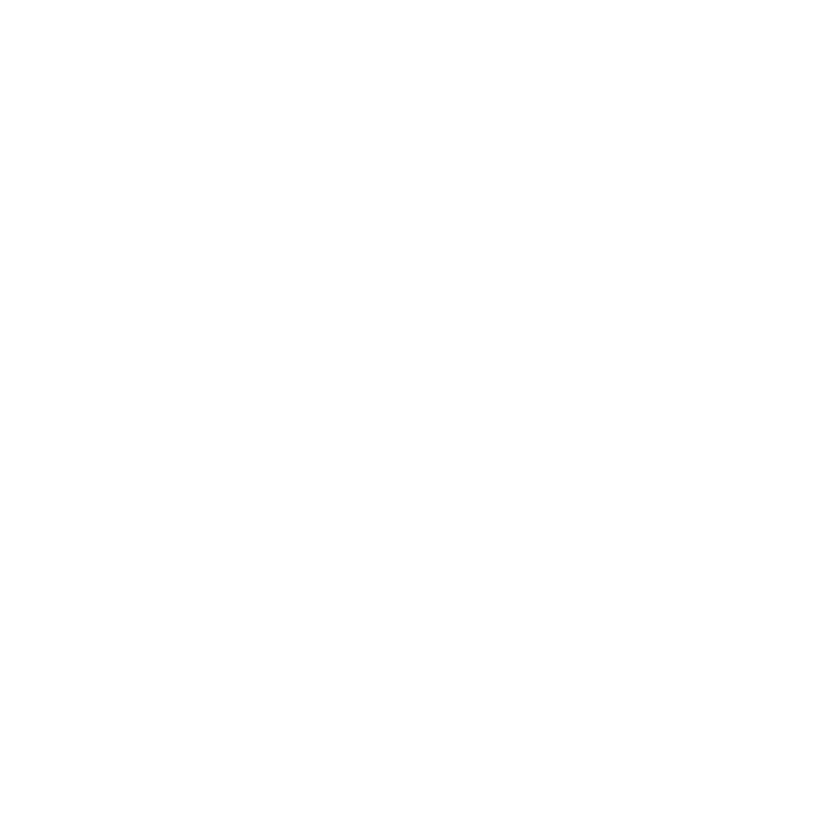

In [354]:
heatmap(scaled.heat.map, Colv = NA, Rowv = NA, col="gris")



In [416]:
scaled.heat.map

MP1       MP2       MP3       MP4       MP5       MP6      
FP236383.3 0.4260298 0.0000000 0.5100287 0.0000000 0.3534155 1.0000000
FP671120.4 0.3750027 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
VIM        0.4496112 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
ACTB       0.4520711 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
EEF1A1     0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
COL6A1     0.6585103 0.0000000 0.0000000 0.0000000 0.6650482 1.0000000
EEF2       0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
HLA-A      0.0000000 0.0000000 0.0000000 0.5083175 0.0000000 1.0000000
TIMP2      0.6543132 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
FTH1       0.4913576 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
AHNAK      0.7419672 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
MT2A       0.4623832 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
S100A11    0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
NORAD      0.4505205 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
FLNA       0.4293610 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
CANX       0.4523611 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
FGFR1      0.6647764 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
ACTG1      0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
HSP90AB1   0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
PPIA       0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
PSAP       0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 1.0000000
COL1A2     0.9195641 0.0000000 0.0000000 0.0000000 1.0000000 0.9425693
GPC6       0.8695883 0.0000000 0.0000000 0.0000000 1.0000000 0.0000000
DST        0.3968388 0.0000000 0.0000000 0.0000000 1.0000000 0.3637965
FNDC3B     0.3515858 0.2533664 0.0000000 0.0000000 1.0000000 0.0000000
TCF12      0.3869580 0.0000000 0.5148546 0.0000000 1.0000000 0.0000000
VPS13B     0.7047072 0.0000000 0.8258677 0.0000000 1.0000000 0.0000000
ZFAND3     0.8103320 0.9013571 0.8298978 0.0000000 1.0000000 0.0000000
VMP1       0.4056001 0.6035005 0.0000000 0.0000000 1.0000000 0.0000000
TRPS1      0.0000000 0.0000000 0.0000000 0.0000000 1.0000000 0.0000000
⋮          ⋮         ⋮         ⋮         ⋮         ⋮         ⋮        
GSE1       1         0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
SPIDR      1         0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
DPYD       1         0.0000000 0.0000000 0.9113580 0.0000000 0.0000000
UTRN       1         0.0000000 0.0000000 0.0000000 0.5659486 0.0000000
MACF1      1         0.6900210 0.6258675 0.7011384 0.6616486 0.0000000
GNAQ       1         0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
PCDH9      1         0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
SND1       1         0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
FYN        1         0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
SMCHD1     1         0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
MYCBP2     1         0.0000000 0.0000000 0.8853340 0.0000000 0.0000000
KANSL1     1         0.7374192 0.0000000 0.7923886 0.5973278 0.0000000
DDX17      1         0.8342773 0.7601030 0.8142445 0.0000000 0.0000000
COL6A3     1         0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
EBF1       1         0.0000000 0.0000000 0.0000000 0.5697923 0.0000000
FBN1       1         0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
COL6A2     1         0.0000000 0.0000000 0.0000000 0.5128594 0.8358485
COL5A1     1         0.0000000 0.0000000 0.0000000 0.5642446 0.0000000
GSN        1         0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
FSTL1      1         0.0000000 0.0000000 0.0000000 0.3959659 0.0000000
HNRNPA2B1  1         0.0000000 0.6110161 0.0000000 0.8472481 0.8879211
MYH9       1         0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
APP        1         0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
H3F3B      1         0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
SRRM2      1         0.6962134 0.00

In [29]:
unscaled_heat_map <- as.data.frame(read_csv("unscaled_em_gmm_output_t50.csv"))

colnames(unscaled_heat_map) <- c("gene", "MP1", "MP2", "MP3", "MP4", "MP5", "MP6")
rownames(unscaled_heat_map) <- (unscaled_heat_map$gene)
unscaled_heat_map<-unscaled_heat_map[c("MP1", "MP2", "MP3", "MP4", "MP5", "MP6")]

t_heat.map <- as.data.frame(unscaled_heat_map)
t_heat.map[["Max"]] <- colnames(unscaled_heat_map)[max.col(unscaled_heat_map,ties.method="first")]

t_heat.map

Rows: 140 Columns: 7
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Unnamed: 0
dbl (6): MP1, MP2, MP3, MP4, MP5, MP6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


MP1       MP2       MP3       MP4       MP5       MP6       Max
TCF4       0.0000000 0.0000000 0.7263154 0.0000000 0.0000000 0.0000000 MP3
ATG7       0.0000000 0.8793797 0.0000000 0.0000000 0.0000000 0.0000000 MP2
KCNMA1     0.0000000 1.2633982 0.0000000 0.0000000 0.0000000 0.0000000 MP2
PSAP       0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.8146100 MP6
UBE2E2     0.4683059 0.8009265 0.0000000 0.0000000 0.4864155 0.0000000 MP2
PPIA       0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.8080121 MP6
HSP90AB1   0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.7839207 MP6
ACTG1      0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.8680159 MP6
FGFR1      0.5250377 0.0000000 0.0000000 0.0000000 0.0000000 0.7897960 MP6
VCAN       1.0281132 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
HLA-C      0.4021716 0.0000000 0.0000000 0.6456188 0.0000000 0.0000000 MP4
CANX       0.3710524 0.0000000 0.0000000 0.0000000 0.0000000 0.8202572 MP6
FLNA       0.3572983 0.0000000 0.0000000 0.0000000 0.0000000 0.8321628 MP6
NORAD      0.3680991 0.0000000 0.0000000 0.0000000 0.0000000 0.8170530 MP6
S100A11    0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.9962505 MP6
COL4A1     0.9353972 0.0000000 0.0000000 0.0000000 0.0000000 0.8063036 MP1
MT2A       0.7403291 0.0000000 0.0000000 0.0000000 0.0000000 1.6011157 MP6
DYNC1H1    0.6077898 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
S100A6     0.8442971 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
AHNAK      0.7855488 0.0000000 0.0000000 0.0000000 0.0000000 1.0587379 MP6
HSP90AA1   1.0110700 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
SRRM2      1.1726209 0.8163944 0.0000000 0.0000000 0.0000000 0.7793961 MP1
FTH1       0.5904710 0.0000000 0.0000000 0.0000000 0.0000000 1.2017134 MP6
H3F3B      0.5394672 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
APP        0.8128705 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
MYH9       0.4558292 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
HNRNPA2B1  0.9571244 0.0000000 0.5848184 0.0000000 0.8109219 0.8498509 MP1
TIMP2      0.5646062 0.0000000 0.0000000 0.0000000 0.0000000 0.8628990 MP6
HLA-A      0.0000000 0.0000000 0.0000000 0.7806828 0.0000000 1.5358171 MP6
FSTL1      1.2845011 0.0000000 0.0000000 0.0000000 0.5086186 0.0000000 MP1
⋮          ⋮         ⋮         ⋮         ⋮         ⋮         ⋮         ⋮  
SPIDR      0.6380214 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
GSE1       0.8116344 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
VPS13B     0.6529913 0.0000000 0.7652603 0.0000000 0.9266137 0.0000000 MP5
FOXN3      1.2776325 1.1059880 0.0000000 0.0000000 0.0000000 0.0000000 MP1
LPP        0.8143418 1.0392028 0.0000000 0.0000000 0.7738523 0.8381873 MP2
IMMP2L     1.0138334 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
CBLB       1.3992144 0.0000000 0.0000000 1.0468121 0.0000000 0.0000000 MP1
EXOC4      0.8420399 0.7796019 0.7162315 1.0060851 0.8660828 0.0000000 MP4
TCF12      0.5814925 0.0000000 0.7736862 0.0000000 1.5027276 0.0000000 MP5
JMJD1C     0.6892917 0.8129982 0.0000000 0.8964801 0.5532829 0.0000000 MP4
STAG1      0.9053575 0.0000000 0.0000000 0.8561429 0.5394717 0.0000000 MP1
FOXP1      0.8762251 0.0000000 0.0000000 0.0000000 0.6975318 0.0000000 MP1
STK3       0.7663906 0.0000000 0.0000000 0.0000000 0.7622308 0.0000000 MP1
ZBTB20     1.5369958 0.0000000 1.3149618 0.9540114 0.6819032 0.7557112 MP1
ARID1B     0.8523807 0.7419785 0.7306813 0.8919085 0.7042473 0.0000000 MP4
FTX        0.9260068 0.8693802 0.7335500 0.6145332 0.5217927 0.0000000 MP1
FNDC3B     0.8420119 0.6067865 0.0000000 0.0000000 2.3948977 0.0000000 MP5
DST        0.9113736 0.0000000 0.0000000 0.0000000 2.2965837 0.8354891 MP5
FP671120.4 1.3775935 0.0000000 0.0000000 0.0000000 0.0000000 3.6735561 MP6
GPC6       1.5160264 0.0000000 0.0000000 0.0000000 1.7433841 0.0000000 MP5
KAZN       1.1297928 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
TTC28      0.7834370 0.0000000 0.000

In [30]:
matrix_genes <- c('VCAN', 'COL4A1', 'DYNC1H1', 'S100A6', 'HSP90AA1', 'SRRM2', 'H3F3B',
       'APP', 'MYH9', 'FSTL1', 'GSN', 'COL5A1', 'FBN1', 'EBF1', 'COL6A3',
       'MYCBP2', 'SMCHD1', 'FYN', 'SND1', 'PCDH9', 'GNAQ', 'DPYD', 'SPIDR',
       'GSE1', 'FOXN3', 'IMMP2L', 'CBLB', 'FOXP1', 'KAZN', 'TENM3', 'LRMDA',
       'PTPRG', 'RBMS3', 'ATG7', 'KCNMA1', 'UBE2E2', 'ARHGAP15', 'ARHGAP26',
       'RNF213', 'CD74', 'FCHSD2', 'ETV6', 'SFMBT2', 'QKI', 'ITPR2', 'SAT1',
       'ZEB2', 'CHST11', 'DOCK4', 'TCF4', 'WWOX', 'HIPK2', 'MEF2A', 'MAML2','ZFAND3','TCF12',
       'DOCK2', 'B2M', 'DOCK8', 'CDC42SE2', 'ARAP2', 'LRBA', 'PTPRC', 'CELF2',
       'ELMO1', 'ARID1B', 'NOTCH2', 'MIR4435-2HG', 'APBB2', 'EPS8', 'PRKG1',
       'CAMK2D', 'COL5A2', 'FBXL7', 'DLC1', 'TRPS1',  'VPS13B',
        'FNDC3B', 'DST', 'GPC6', 'COL1A2', 'PSAP', 'PPIA', 'HSP90AB1',
       'ACTG1', 'CANX', 'FLNA', 'NORAD', 'S100A11', 'MT2A', 'AHNAK', 'TIMP2',
       'EEF2', 'COL6A1', 'EEF1A1', 'VIM')

In [31]:
t_heat.map[(rownames(t_heat.map)  %in% matrix_genes) ,]


MP1       MP2       MP3       MP4       MP5       MP6       Max
TCF4     0.0000000 0.0000000 0.7263154 0         0.0000000 0.0000000 MP3
ATG7     0.0000000 0.8793797 0.0000000 0         0.0000000 0.0000000 MP2
KCNMA1   0.0000000 1.2633982 0.0000000 0         0.0000000 0.0000000 MP2
PSAP     0.0000000 0.0000000 0.0000000 0         0.0000000 0.8146100 MP6
UBE2E2   0.4683059 0.8009265 0.0000000 0         0.4864155 0.0000000 MP2
PPIA     0.0000000 0.0000000 0.0000000 0         0.0000000 0.8080121 MP6
HSP90AB1 0.0000000 0.0000000 0.0000000 0         0.0000000 0.7839207 MP6
ACTG1    0.0000000 0.0000000 0.0000000 0         0.0000000 0.8680159 MP6
VCAN     1.0281132 0.0000000 0.0000000 0         0.0000000 0.0000000 MP1
CANX     0.3710524 0.0000000 0.0000000 0         0.0000000 0.8202572 MP6
FLNA     0.3572983 0.0000000 0.0000000 0         0.0000000 0.8321628 MP6
NORAD    0.3680991 0.0000000 0.0000000 0         0.0000000 0.8170530 MP6
S100A11  0.0000000 0.0000000 0.0000000 0         0.0000000 0.9962505 MP6
COL4A1   0.9353972 0.0000000 0.0000000 0         0.0000000 0.8063036 MP1
MT2A     0.7403291 0.0000000 0.0000000 0         0.0000000 1.6011157 MP6
DYNC1H1  0.6077898 0.0000000 0.0000000 0         0.0000000 0.0000000 MP1
S100A6   0.8442971 0.0000000 0.0000000 0         0.0000000 0.0000000 MP1
AHNAK    0.7855488 0.0000000 0.0000000 0         0.0000000 1.0587379 MP6
HSP90AA1 1.0110700 0.0000000 0.0000000 0         0.0000000 0.0000000 MP1
SRRM2    1.1726209 0.8163944 0.0000000 0         0.0000000 0.7793961 MP1
H3F3B    0.5394672 0.0000000 0.0000000 0         0.0000000 0.0000000 MP1
APP      0.8128705 0.0000000 0.0000000 0         0.0000000 0.0000000 MP1
MYH9     0.4558292 0.0000000 0.0000000 0         0.0000000 0.0000000 MP1
TIMP2    0.5646062 0.0000000 0.0000000 0         0.0000000 0.8628990 MP6
FSTL1    1.2845011 0.0000000 0.0000000 0         0.5086186 0.0000000 MP1
GSN      1.3455710 0.0000000 0.0000000 0         0.0000000 0.0000000 MP1
EEF2     0.0000000 0.0000000 0.0000000 0         0.0000000 0.7938960 MP6
COL5A1   1.1787158 0.0000000 0.0000000 0         0.6650840 0.0000000 MP1
COL6A1   0.8811567 0.0000000 0.0000000 0         0.8899052 1.3381063 MP6
EEF1A1   0.0000000 0.0000000 0.0000000 0         0.0000000 0.8122577 MP6
⋮        ⋮         ⋮         ⋮         ⋮         ⋮         ⋮         ⋮  
CELF2    0.0000000 0.0000000 0.0000000 1.1954129 0.0000000 0.0000000 MP4
ETV6     0.0000000 1.1866099 0.0000000 0.0000000 0.6544028 0.0000000 MP2
SFMBT2   0.0000000 1.3322480 0.0000000 0.0000000 0.0000000 0.0000000 MP2
QKI      0.9186863 1.2899052 0.0000000 0.0000000 0.5539457 0.0000000 MP2
MAML2    0.0000000 0.0000000 0.7438975 0.0000000 0.6466898 0.0000000 MP3
ITPR2    0.0000000 0.9108171 0.0000000 0.0000000 0.0000000 0.0000000 MP2
SAT1     0.0000000 1.4786841 0.0000000 0.0000000 0.0000000 0.0000000 MP2
ELMO1    0.3934902 0.0000000 0.0000000 1.0837893 0.0000000 0.0000000 MP4
ZEB2     0.5965613 0.9669928 0.0000000 0.0000000 0.0000000 0.0000000 MP2
CHST11   0.0000000 1.5003889 0.0000000 0.9128904 0.0000000 0.0000000 MP2
DOCK4    0.0000000 1.0776171 0.0000000 0.0000000 0.0000000 0.0000000 MP2
DPYD     1.2570055 0.0000000 0.0000000 1.1455821 0.0000000 0.0000000 MP1
SPIDR    0.6380214 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
GSE1     0.8116344 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
VPS13B   0.6529913 0.0000000 0.7652603 0.0000000 0.9266137 0.0000000 MP5
FOXN3    1.2776325 1.1059880 0.0000000 0.0000000 0.0000000 0.0000000 MP1
IMMP2L   1.0138334 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 MP1
CBLB     1.3992144 0.0000000 0.0000000 1.0468121 0.0000000 0.0000000 MP1
TCF12    0.5814925 0.0000000 0.7736862 0.0000000 1.5027276 0.0000000 MP5
FOXP1    0.8762251 0.0000000 0.0000000 0.0000000 0.6975318 0.0000000 MP1
ARID1B   0.8523807 0.7419785 0.7306813 0.8919085 0.7042473 0.0000000 MP4
FNDC3B   0.8420119 0.6067865 0.0000000 0.0000000 2.3948977 0.0000000 MP5
DST      0.9113736 0.0000000 0.0000000 0.0000000 2.2965837 0.835489

In [49]:
samp <- "MP1"
genes <- rownames(filter(t_heat.map, Max == samp))
final_str <- ''
for (x in genes){
    final_str<- paste(final_str, "", x)
}
print(final_str)

[1] "  VCAN  COL4A1  DYNC1H1  S100A6  HSP90AA1  SRRM2  H3F3B  APP  MYH9  HNRNPA2B1  FSTL1  GSN  COL5A1  COL6A2  FBN1  EBF1  COL6A3  DDX17  KANSL1  MYCBP2  SMCHD1  FYN  SND1  PCDH9  GNAQ  MACF1  UTRN  DPYD  SPIDR  GSE1  FOXN3  IMMP2L  CBLB  STAG1  FOXP1  STK3  ZBTB20  FTX  KAZN  TTC28  TENM3  LRMDA  PTPRG  AUTS2  RBMS3"


In [37]:
samp <- "MP6"
genes <- rownames(filter(t_heat.map, Max == samp))



library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)
# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature
mylist <-  read.csv(file="t100_genes_per_metaprogram.csv")
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2021")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
dim(mut_enr)
write.csv(mut_enr,file="mut_enr_metagenes.csv")
mp = "Meta-program n"
cohort = "Sarcoma"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = "Top100"
h_mut_enr1 <- mut_enr[1:25,]#[1:500,]
h_mut_enr <- h_mut_enr1

ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes")) +xlab("qscore") + ylab("Description")
pdf(paste0(mp,"_", cohort,"_Enrichment_",enrichdbs,"_",topn,"_v1_", samp, "_EM_GMM.pdf"), width = 10, height = 10)
print(myggp)
dev.off()



Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



geneCoverage genesPerTerm libraryName                     
1 13362         275         Genome_Browser_PWMs             
2 27884        1284         TRANSFAC_and_JASPAR_PWMs        
3  6002          77         Transcription_Factor_PPIs       
4 47172        1370         ChEA_2013                       
5 47107         509         Drug_Perturbations_from_GEO_2014
6 21493        3713         ENCODE_TF_ChIP-seq_2014         
  link                                                     numTerms
1 http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/ 615     
2 http://jaspar.genereg.net/html/DOWNLOAD/                 326     
3                                                          290     
4 http://amp.pharm.mssm.edu/lib/cheadownload.jsp           353     
5 http://www.ncbi.nlm.nih.gov/geo/                         701     
6 http://genome.ucsc.edu/ENCODE/downloads.html             498     
  appyter                                  categoryId
1 ea115789fcbf12797fd692cec6df0ab4dbc79c6a 1         
2 7d42eb43a64a4e3b20d721fc7148f685b53b6b30 1         
3 849f222220618e2599d925b6b51868cf1dab3763 1         
4 7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630 7         
5 ad270a6876534b7cb063e004289dcd4d3164f342 7         
6 497787ebc418d308045efb63b8586f10c526af51 7

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


[1] 17 10

[1] 455  10

[1] 472  10

png 
  2

In [51]:
rownames(filter(t_heat.map, Max == "MP3"))

[1] "TCF4"   "MAP4K4" "WWOX"   "HIPK2"  "MEF2A"  "MAML2"

In [ ]:
heat.map

library(heat.map)
df %>% filter(rowSums() >= 10)


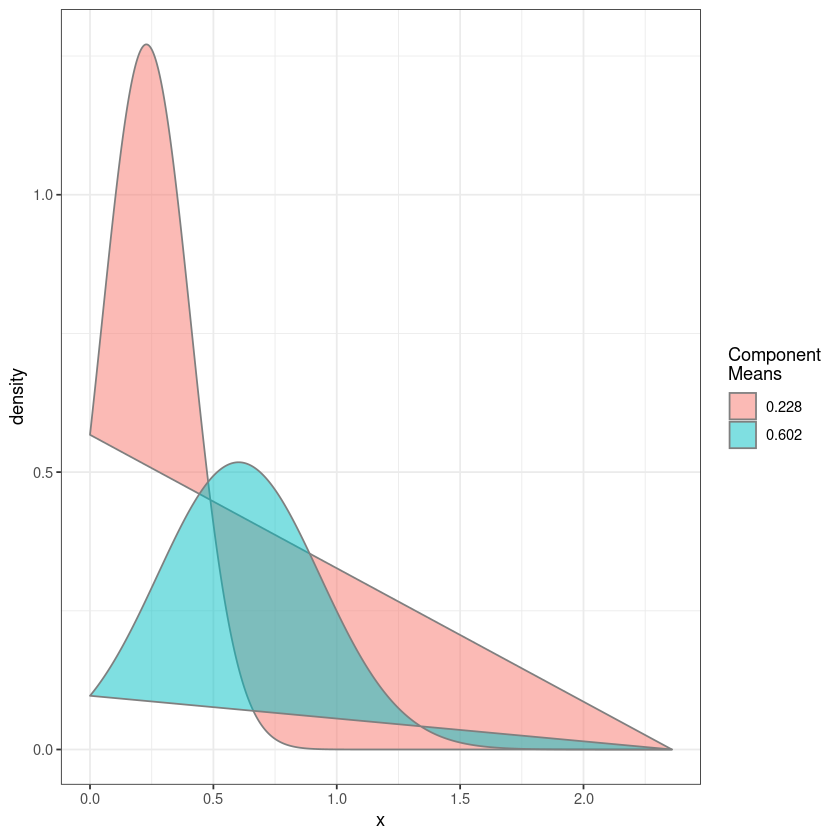

In [132]:
print(mygrobsem_gene_exp_gmm)

In [72]:
gene_list[1]

[1] "MALAT1"

In [152]:
y<- MP_seurats[[1]]    
t <- y[, sample(colnames(y), size = 1000, replace=F)]
seu <- NormalizeData(t, normalization.method = "LogNormalize", scale.factor = 1000)
seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures = 2000)
seu <- ScaleData(seu, features = rownames(seu))
index <- index + 1 
gene_exp.copy1 <- as.matrix(GetAssayData(seu)) 



Centering and scaling data matrix



One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying n

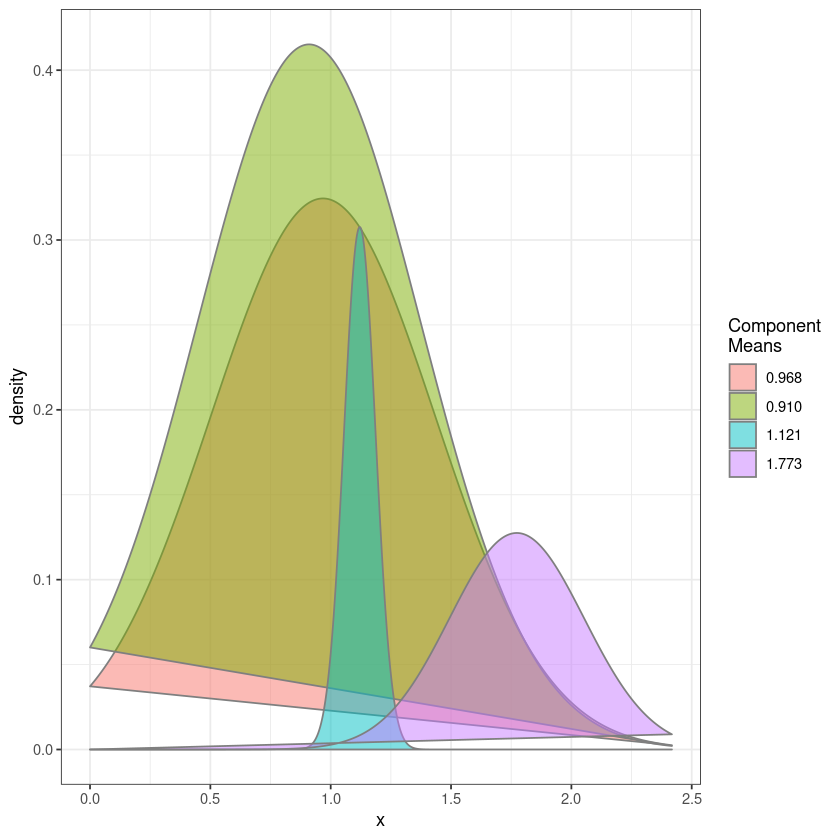

In [160]:
gene_exp<-gene_exp.copy1["FSTL1",]

gene_exp_gmm <- normalmixEM(gene_exp, 
                                lambda=NULL, mu=NULL, sigma=NULL, k= 4)
x       <- with(gene_exp_gmm,seq(min(x),max(x),len=1000))
      pars    <- with(gene_exp_gmm,data.frame(comp=colnames(posterior), mu, sigma,lambda))
      em.df   <- data.frame(x=rep(x,each=nrow(pars)),pars)
      em.df$y <- with(em.df,lambda*dnorm(x,mean=mu,sd=sigma))





ggplot(data.frame(x=gene_exp_gmm$x),aes(x,y=..density..)) + 
        #type = rep(c('tumor', 'normal'), c(503,313)) +
        #geom_histogram(fill=NA,color="black")+
        geom_polygon(data=em.df,aes(x,y,fill=comp),color="grey50", alpha=0.5)+
        #geom_polygon(data=em.df,aes(x,y,fill=type),color="grey50", alpha=0.5)+
        scale_fill_discrete("Component\nMeans",labels=format(em.df$mu,digits=3))+
       # scale_fill_discrete("Component\nSD",labels=format(em.df$sd,digits=3))+
        theme_bw()

In [46]:
mean(gene_exp)

gene_exp

[1] 370.7617

Sarcoma322GEX.3_CATCAGACAAGCTGAG.1  Sarcoma322GEX.3_AGCAGCCAGCACCGCT.1 
                          615.57620                           159.25468 
 Sarcoma322GEX.3_AAGCCGCTCGTTTATC.1  Sarcoma322GEX.3_CACCTTGAGGCGCTCT.1 
                          579.55256                           614.59405 
 Sarcoma322GEX.3_ATTATCCAGCTGCAAG.1  Sarcoma322GEX.3_GACGTTAGTTCCACAA.1 
                          157.96967                           272.47462 
 Sarcoma322GEX.3_CTTGGCTGTTAAGATG.1  Sarcoma322GEX.3_CGGACTGAGCGTAATA.1 
                          639.53621                           231.93011 
 Sarcoma322GEX.3_CTTCTCTTCTTTAGTC.1  Sarcoma322GEX.3_GCACATAGTACTCGCG.1 
                          423.64475                           301.32365 
 Sarcoma322GEX.3_CGCTATCAGAGTCTGG.1  Sarcoma322GEX.3_TCAGGTATCGGTTAAC.1 
                          570.86455                           393.81916 
 Sarcoma322GEX.3_ATCATCTGTTGGAGGT.1  Sarcoma322GEX.3_CGCTGGAGTCACCCAG.1 
                          468.85929                           475.24910 
 Sarcoma322GEX.3_GTAACGTCAAGAGGCT.1  Sarcoma322GEX.3_CGTAGGCTCTTACCGC.1 
                          502.19783                           288.12972 
 Sarcoma322GEX.3_AACCGCGTCCAACCAA.1  Sarcoma322GEX.3_CCTACACGTCACCTAA.1 
                          388.93997                           220.73725 
 Sarcoma322GEX.3_TTGCGTCCAGTGACAG.1  Sarcoma322GEX.3_AAGGTTCCACCAACCG.1 
                          448.80114                           308.14935 
 Sarcoma322GEX.3_CAGCAGCAGCGTCAAG.1  Sarcoma322GEX.3_AGGTCCGGTATGCTTG.1 
                          346.74990                           350.31636 
 Sarcoma322GEX.3_TGGGCGTCACATGGGA.1  Sarcoma322GEX.3_ACGATGTCACACGCTG.1 
                          574.32909                           632.29118 
 Sarcoma322GEX.3_ATCATCTAGGAGCGAG.1  Sarcoma322GEX.3_GGACGTCTCAACGGCC.1 
                          414.30621                           474.19666 
 Sarcoma322GEX.3_TACACGACAAGTTAAG.1  Sarcoma322GEX.3_GTCTCGTTCGGAAACG.1 
                          379.38311                           571.25567 
 Sarcoma322GEX.3_GCATGCGAGACTTGAA.1  Sarcoma322GEX.3_CTGCCTAGTATTAGCC.1 
                          396.54791                           665.13557 
 Sarcoma322GEX.3_CTAGCCTAGTGCCAGA.1  Sarcoma322GEX.3_GCTCTGTAGACGCTTT.1 
                          239.39971                           389.75424 
 Sarcoma322GEX.3_CTGCTGTAGTGGGCTA.1  Sarcoma322GEX.3_CAACCAATCACGATGT.1 
                          439.54724                           534.20126 
 Sarcoma322GEX.3_AAGCCGCGTGATGATA.1  Sarcoma322GEX.3_TGCGGGTTCCACTCCA.1 
                          553.27494                           423.23097 
 Sarcoma322GEX.3_CGTAGGCTCCACGACG.1  Sarcoma322GEX.3_CGTGAGCCAAGGACTG.1 
                          508.49491                           311.27973 
 Sarcoma322GEX.3_GCAGCCATCTGCCAGG.1  Sarcoma322GEX.3_ATTATCCAGAATGTTG.1 
                          392.48476                           477.49252 
 Sarcoma322GEX.3_TTGGCAAGTCCGAACC.1  Sarcoma322GEX.3_CGTTGGGCACCAACCG.1 
                          480.24775                           440.38257 
 Sarcoma322GEX.3_GGCCGATGTAAAGGAG.1  Sarcoma322GEX.3_AACTCTTTCGTTTAGG.1 
                          547.94639                           444.73766 
 Sarcoma322GEX.3_TCGTAGATCTTACCTA.1  Sarcoma322GEX.3_TACACGATCTCCAACC.1 
                          466.37939                           463.71614 
 Sarcoma322GEX.3_GACTACACAACGATGG.1  Sarcoma322GEX.3_GATGAGGTCCGTCATC.1 
                          145.11750                           197.03628 
 Sarcoma322GEX.3_ATGTGTGCAGGAATGC.1  Sarcoma322GEX.3_GACGGCTTCCAGTATG.1 
                          417.16159                           672.91347 
 Sarcoma322GEX.3_TGCACCTTCATCTGTT.1  Sarcoma322GEX.3_CCACCTAGTCATATCG.1 
                          350.80404                           462.52907 
 Sarcoma322GEX.3_CTTGGCTCACTAGTAC.1  Sarcoma322GEX.3_CTTTGCGAGGGTATCG.1 
                          598.25389                           506.08609 
 Sarcoma322GEX.3_GGCAATTTCCGGGTGT.1  Sarcoma322GEX.3_GTTCTC

In [54]:
any(is.na(as.matrix(GetAssayData(gene_exp))))

[1] FALSE

In [56]:
saveRDS(as.matrix(GetAssayData(gene_exp)), "MALAT1_gene_exp_matrix.rds")

In [14]:
new_obj = CreateSeuratObject(counts = merged.all.cells@assays$RNA)
merged.all.cells@meta.data = merged.all.cells@meta.data


In [16]:
gene_exp<-gene_exp["IGKC",]

In [12]:
gene_exp@assays$RNA

DefaultAssay(gene_exp[]) 


Assay data with 34944 features for 75716 cells
Top 10 variable features:
 IGHV5-51, IGLC1, IGLV2-8, IGKC, IGLC2, IGHG2, IGLC3, IGHG1, IGKV3-20,
IGKV3-11 

[1] "RNA"